<a href="https://colab.research.google.com/github/Sohaib9920/AI_notebooks/blob/main/hands_on_machine_learning_3rd_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Model

## Solving Vanishing/Exploding Gradients Problem:

Gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the gradient descent update leaves the lower layers’ connection weights virtually unchanged, and training never converges to a good solution. This is called the vanishing gradients problem. In some cases, the opposite can happen: the gradients can grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges. This is the exploding gradients problem, which surfaces most often in recurrent neural networks. More generally, deep neural networks suffer from unstable gradients; different layers may learn at widely different speeds.

We can solve this problem and improve performance using following techniques:

### 1. Weight Initialization:

By default, Keras uses Glorot initialization with a uniform distribution.

We don’t want the signal to die out, nor do we want it to explode and saturate. For the signal to flow properly, we need the variance of the outputs of each layer to be equal to the variance of its inputs.

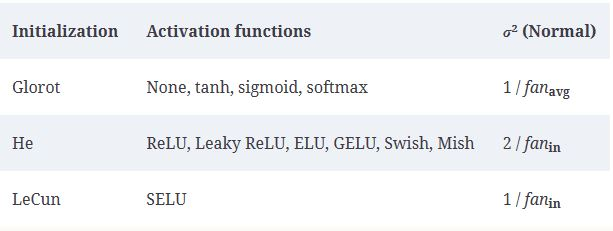

### 2. Better activations:


#### ReLU:

- Usually preferred
- It does not saturate for positive values, and is very fast to compute.
- It suffers from a problem known as the dying ReLUs: during training, some neurons effectively “die”, meaning they stop outputting anything other than 0.

#### LeakyReLU:
- $LeakyReLU_α(z) = max(αz, z)$
- The hyperparameter α defines how much the function “leaks”: it is the slope of the function for z < 0
- Having a slope for z < 0 ensures that leaky ReLUs never die; they can go into a long coma, but they have a chance to eventually wake up
- LeakyReLU always outperformed the strict ReLU activation function. In fact, setting α = 0.2 (a huge leak) seemed to result in better performance than α = 0.01 (a small leak)
- Parametric leaky ReLU (PReLU), where α is authorized to be learned during training. PReLU was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set

ReLU, leaky ReLU, and PReLU all suffer from the fact that they are not smooth functions: their derivatives abruptly change (at z = 0). This sort of discontinuity can make gradient descent bounce around the optimum, and slow down convergence.

#### ELU:
- Exponential linear unit (ELU) outperformed all the ReLU variants: training time was reduced, and the neural network performed better on the test set.
- $$
ELU(z) = \begin{cases}
  z & \text{if } z > 0, \\
  \alpha \cdot (e^z - 1) & \text{if } x \leq 0.
\end{cases}
$$
- If α is equal to 1 then the function is smooth everywhere, including around z = 0, which helps speed up gradient descent since it does not bounce as much to the left and right of z = 0.
- The main drawback of the ELU activation function is that it is slower to compute than the ReLU function and its variants (due to the use of the exponential function). Its faster convergence rate during training may compensate for that slow computation, but still, at test time an ELU network will be a bit slower than a ReLU network.

#### SELU:
- It is a scaled variant of the ELU activation function (about 1.05 times ELU, using α ≈ 1.67)
- The SELU activation function, when used in a multi-layer perceptron (MLP) with LeCun normal weight initialization and standardized input features, can enable self-normalization. This means that the output of each layer tends to maintain a mean of 0 and a standard deviation of 1 during training, addressing the vanishing/exploding gradients problem. However, self-normalization is only guaranteed for plain MLPs with standardized inputs; using SELU in other architectures may not outperform ELU. Additionally, certain regularization techniques like ℓ1 or ℓ2 regularization, max-norm, batch-norm, and regular dropout are incompatible with SELU.

#### GELU:
- $GELU = zΦ(z)$ is a smooth variant of the ReLU activation function. Φ is the standard Gaussian cumulative distribution function which corresponds to the probability that a value sampled randomly from a normal distribution of mean 0 and variance 1 is lower than z.
- It often outperforms every other activation function discussed so far. However, it is a bit more computationally intensive, and the performance boost it provides is not always sufficient to justify the extra cost.
- It is possible to show that it is approximately equal to $zσ(1.702 z)$, where σ is the sigmoid function: using this approximation also works very well, and it has the advantage of being much faster to compute.

#### Swish:
- $Swish = zσ(z)$ Outperforms GELU.
- The generalized Swish function is $Swish_β(z) = zσ(βz)$, so GELU is approximately equal to the generalized Swish function using β = 1.702.
- It’s also possible to make β trainable and let gradient descent optimize it: much like PReLU, this can make your model more powerful, but it also runs the risk of overfitting the data.

#### Mish:
- It is defined as $mish(z) = ztanh(softplus(z))$, where $softplus(z) = log(1 + exp(z))$. Just like GELU and Swish, it is a smooth, nonconvex, and nonmonotonic variant of ReLU, and once again the author ran many experiments and found that Mish generally outperformed other activation functions—even Swish and GELU, by a tiny margin.

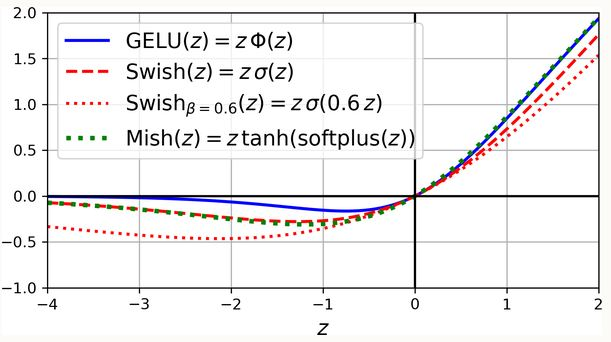

#### Summary:
So, which activation function should you use for the hidden layers of your deep neural networks?

- ReLU is usually a good default for the hidden layers, as it is fast and yields good results. Its ability to output precisely zero can also be useful in some cases. Moreover, it can sometimes benefit from optimized implementations as well as from hardware acceleration.
- The leaky ReLU variants of ReLU can improve the model's quality without hindering its speed too much compared to ReLU.
- For large neural nets and more complex problems, GLU, Swish and Mish can give you a slightly higher quality model, but they have a computational cost. Swish is the good default.
- The hyperbolic tangent (tanh) can be useful in the output layer if you need to output a number in a fixed range (by default between –1 and 1), but nowadays it is not used much in hidden layers, except in recurrent nets.
- The sigmoid activation function is also useful in the output layer when you need to estimate a probability (e.g., for binary classification), but it is rarely used in hidden layers (there are exceptions—for example, for the coding layer of variational autoencoders).
- The softplus activation function is useful in the output layer when you need to ensure that the output will always be positive.
- The softmax activation function is useful in the output layer to estimate probabilities for mutually exclusive classes, but it is rarely (if ever) used in hidden layers.

### 3. Batch Normalization:

- This operation simply zero-centers and normalizes each input, then scales and shifts the result using two new parameter vectors per layer: one for scaling, the other for shifting. In other words, the operation lets the model learn the optimal scale and mean of each of the layer’s inputs.
- In order to zero-center and normalize the inputs, the algorithm needs to estimate each input’s mean and standard deviation. It does so by evaluating the mean and standard deviation of the input over the current mini-batch (hence the name “batch normalization”).


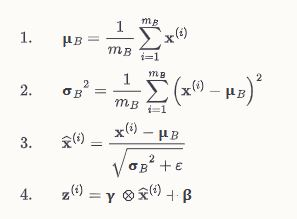

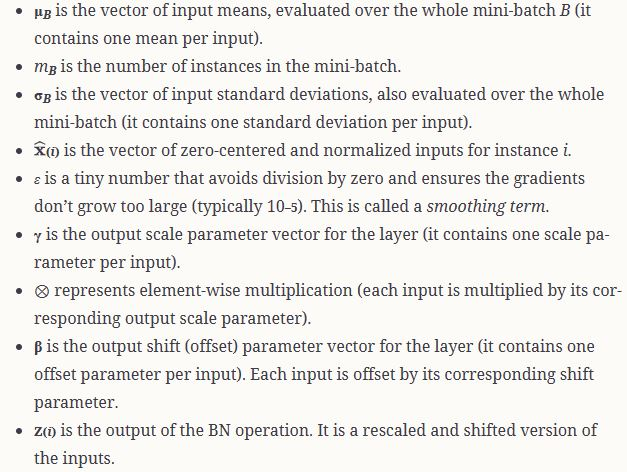

- In many cases, if you add a BN layer as the very first layer of your neural network, you do not need to standardize your training set. That is, there’s no need for StandardScaler or Normalization; the BN layer will do it for you (well, approximately, since it only looks at one batch at a time, and it can also rescale and shift each input feature).

So during training, BN standardizes its inputs, then rescales and offsets them. Good! What about at test time?

-  Indeed, we may need to make predictions for individual instances rather than for batches of instances: in this case, we will have no way to compute each input’s mean and standard deviation. Moreover, even if we do have a batch of instances, it may be too small, or the instances may not be independent and identically distributed, so computing statistics over the batch instances would be unreliable.
- One solution could be to wait until the end of training, then run the whole training set through the neural network and compute the mean and standard deviation of each input of the BN layer. These “final” input means and standard deviations could then be used instead of the batch input means and standard deviations when making predictions.
- However, most implementations of batch normalization estimate these final statistics during training by using a exponential moving average of the layer’s input means and standard deviations. This is what Keras does automatically when you use the BatchNormalization layer. Exponential moving average is also more mermory efficient then avearge of batch means for a neuron because we only need to track single variable rather than history of batch means.

To sum up, **four parameter vectors** are learned in each batch-normalized layer:
- γ (the output scale vector) and β (the output offset vector) are learned through regular backpropagation, and
- μ (the final input mean vector) and σ (the final input standard deviation vector) are estimated using an exponential moving average. They are not affected by backpropagation, so Keras calls them “non-trainable”.
- Note that μ and σ are estimated during training, but they are used only after training (to replace the batch input means and standard deviations in above Equation).

Comments on Batch Normalization:

- Ioffe and Szegedy demonstrated that Batch normalization considerably improved all the deep neural networks they experimented with, leading to a huge improvement in the ImageNet classification task. The vanishing gradients problem was strongly reduced, to the point that they could use saturating activation functions such as the tanh and even the sigmoid activation function. The networks were also much less sensitive to the weight initialization. The authors were able to use much larger learning rates, significantly speeding up the learning process. Specifically, they note that:

    > *Applied to a state-of-the-art image classification model, batch normalization achieves the same accuracy with 14 times fewer training steps, and beats the original model by a significant margin. […​] Using an ensemble of batch-normalized networks, we improve upon the best published result on ImageNet classification: reaching 4.9% top-5 validation error (and 4.8% test error), exceeding the accuracy of human raters.*



- Batch normalization acts like a regularizer, reducing the need for other regularization techniques (such as dropout).
- You may find that training is rather slow, because each epoch takes much more time when you use batch normalization. This is usually counterbalanced by the fact that convergence is much faster with BN, so it will take fewer epochs to reach the same performance. All in all, wall time will usually be shorter (this is the time measured by the clock on your wall).
- However, there is a runtime penalty: the neural network makes slower predictions due to the extra computations required at each layer. Fortunately, it’s often possible to fuse the BN layer with the previous layer after training, thereby avoiding the runtime penalty. This is done by updating the previous layer’s weights and biases so that it directly produces outputs of the appropriate scale and offset. For example, if the previous layer computes XW + b, then the BN layer will compute γ ⊗ (XW + b – μ) / σ + β (ignoring the smoothing term ε in the denominator). If we define W′ = γ⊗W / σ and b′ = γ ⊗ (b – μ) / σ + β, the equation simplifies to XW′ + b′. So, if we replace the previous layer’s weights and biases (W and b) with the updated weights and biases (W′ and b′), we can get rid of the BN layer (TFLite’s converter does this automatically).
- The BatchNormalization class has quite a few hyperparameters you can tweak. The defaults will usually be fine, but you may occasionally need to tweak the momentum. This hyperparameter is used by the BatchNormalization layer when it updates the exponential moving averages; given a new value $v$ (i.e., a new vector of input means or standard deviations computed over the current batch), the layer updates the running average $\hat{v}$ using the following equation:
$$\hat{v} ⟵ \hat{v} \times momentum + v \times (1 - momentum) $$
A good momentum value is typically close to 1; for example, 0.9, 0.99, or 0.999. You want more 9s for larger datasets and for smaller mini-batches. Large momentum value means we are considering longer history of values.
- Another important hyperparameter is axis: it determines which axis should be normalized. It defaults to –1, meaning that by default it will normalize the last axis (using the means and standard deviations computed across the other axes). When the input batch is 2D (i.e., the batch shape is [batch size, features]), this means that each input feature will be normalized based on the mean and standard deviation computed across all the instances in the batch. For example, the first BN layer in the previous code example will independently normalize (and rescale and shift) each of the 784 input features. If we move the first BN layer before the Flatten layer, then the input batches will be 3D, with shape [batch size, height, width]; therefore, the BN layer will compute 28 means and 28 standard deviations (1 per column of pixels, computed across all instances in the batch and across all rows in the column), and it will normalize all pixels in a given column using the same mean and standard deviation. There will also be just 28 scale parameters and 28 shift parameters. If instead you still want to treat each of the 784 pixels independently, then you should set axis=[1, 2].

### 4. Gradient Clipping:



Another technique to mitigate the exploding gradients problem is to clip the gradients during backpropagation so that they never exceed some threshold. This is called gradient clipping.

*This technique is generally used in recurrent neural networks, where using batch normalization is tricky.*


In Keras, implementing gradient clipping is just a matter of setting the clipvalue or clipnorm argument when creating an optimizer, like this:
```python
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile([...], optimizer=optimizer)
```
- This optimizer will clip every component of the gradient vector to a value between –1.0 and 1.0. This means that all the partial derivatives of the loss (with regard to each and every trainable parameter) will be clipped between –1.0 and 1.0.

- The threshold is a hyperparameter you can tune.

- Note that it may change the orientation of the gradient vector. For instance, if the original gradient vector is [0.9, 100.0], it points mostly in the direction of the second axis; but once you clip it by value, you get [0.9, 1.0], which points roughly at the diagonal between the two axes. In practice, this approach works well.
- If you want to ensure that gradient clipping does not change the direction of the gradient vector, you should clip by norm by setting clipnorm instead of clipvalue. This will clip the whole gradient if its ℓ2 norm is greater than the threshold you picked. For example, if you set clipnorm=1.0, then the vector [0.9, 100.0] will be clipped to [0.00899964, 0.9999595], preserving its orientation but almost eliminating the first component.

- If you observe that the gradients explode during training (you can track the size of the gradients using TensorBoard), you may want to try clipping by value or clipping by norm, with different thresholds, and see which option performs best on the validation set.



## Reusing Pretrained Layers

### Transfer Learning:

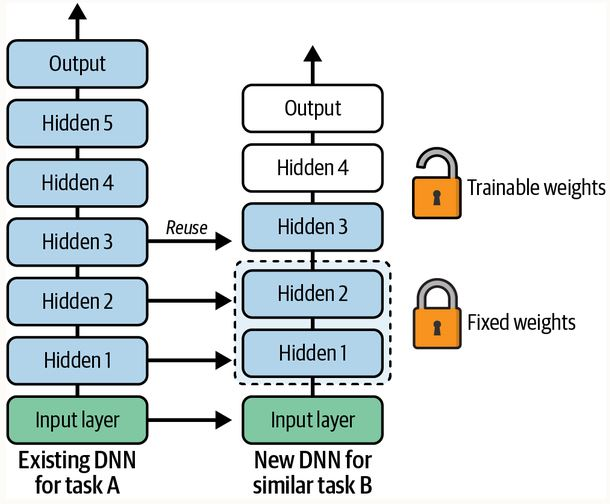

- The upper hidden layers of the original model are less likely to be as useful as the lower layers, since the high-level features that are most useful for the new task may differ significantly from the ones that were most useful for the original task. You want to find the right number of layers to reuse.

- If the input pictures for your new task don’t have the same size as the ones used in the original task, you will usually have to add a preprocessing step to resize them to the size expected by the original model. More generally, transfer learning will work best when the inputs have similar low-level features.

- Try freezing all the reused layers first (i.e., make their weights non-trainable so that gradient descent won’t modify them and they will remain fixed), then train your model and see how it performs. Then try unfreezing one or two of the top hidden layers to let backpropagation tweak them and see if performance improves.

- The more training data you have, the more layers you can unfreeze. It is also useful to reduce the learning rate when you unfreeze reused layers: this will avoid wrecking their fine-tuned weights.

- If you still cannot get good performance, and you have little training data, try dropping the top hidden layer(s) and freezing all the remaining hidden layers again. You can iterate until you find the right number of layers to reuse. If you have plenty of training data, you may try replacing the top hidden layers instead of dropping them, and even adding more hidden layers.

- `tf.keras.models.clone_model()` only clones the architecture, not the weights. If you don’t copy them manually using `set_weights()`, they will be initialized randomly when the cloned model is first used.

- You must always compile your model after you freeze or unfreeze layers.

- After unfreezing the reused layers, it is usually a good idea to reduce the learning rate, once again to avoid damaging the reused weights.


### Unsupervised Pretraining:

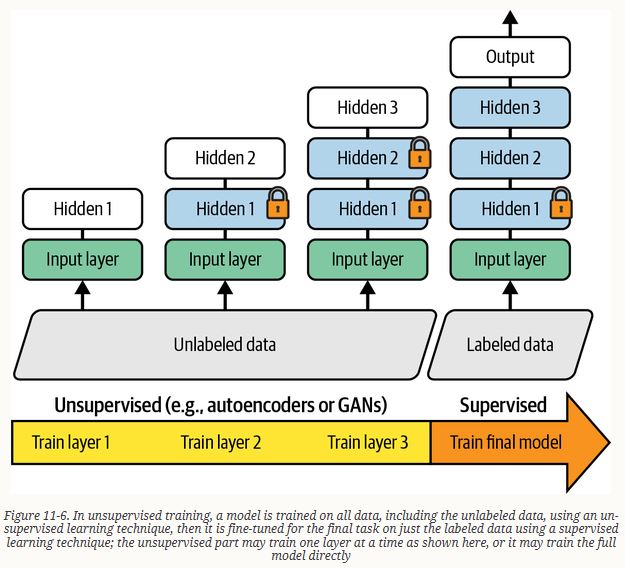

### Pretraining on an Auxiliary Task:

- If you do not have much labeled training data, one last option is to train a first neural network on an auxiliary task for which you can easily obtain or generate labeled training data, then reuse the lower layers of that network for your actual task. The first neural network’s lower layers will learn feature detectors that will likely be reusable by the second neural network.

- For natural language processing (NLP) applications, you can download a corpus of millions of text documents and automatically generate labeled data from it. For example, you could randomly mask out some words and train a model to predict what the missing words are (e.g., it should predict that the missing word in the sentence “What ___ you saying?” is probably “are” or “were”). If you can train a model to reach good performance on this task, then it will already know quite a lot about language, and you can certainly reuse it for your actual task and fine-tune it on your labeled data

## Fast Optimizers:

### Momentum:

- SVD does not care about what the earlier gradients were. If the local gradient is tiny, it goes very slowly. Momentum optimization cares a great deal about what previous gradients were: at each iteration, it subtracts the local gradient from the momentum vector m (multiplied by the learning rate η), and it updates the weights by adding this momentum vector. In other words, the gradient is used as an acceleration, not as a speed. To simulate some sort of friction mechanism and prevent the momentum from growing too large, the algorithm introduces a new hyperparameter β, called the momentum, which must be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9.



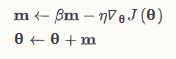

- It computes the exponential moving sum where each past gradient value is given the weight of $(momentum)^n$ where $n$ indicate how past the value is. Larger the momentum value, more will be weight given to past gradients and hence longer history is considered. About 1/(1 - momentum) past values have non-negligible weights.

- This allows momentum optimization to escape from plateaus much faster than gradient descent.

- When the inputs have very different scales, the cost function will look like an elongated bowl. Gradient descent goes down the steep slope quite fast, but then it takes a very long time to go down the valley. In contrast, momentum optimization will roll down the valley faster and faster until it reaches the bottom (the optimum). In deep neural networks that don’t use batch normalization, the upper layers will often end up having inputs with very different scales, so using momentum optimization helps a lot. It can also help roll past local optima.

### NAG/Nesterov momentum:



- It is almost always faster than regular momentum optimization
- It measures the gradient of the cost function not at the local position θ but slightly ahead in the direction of the momentum, at θ + βm


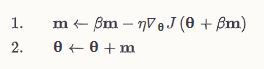

- This small tweak works because in general the momentum vector will be pointing in the right direction (i.e., toward the optimum), so it will be slightly more accurate to use the gradient measured a bit farther in that direction rather than the gradient at the original position

### AdaGrad:

- Consider the elongated bowl problem again: gradient descent starts by quickly going down the steepest slope, which does not point straight toward the global optimum, then it very slowly goes down to the bottom of the valley. It would be nice if the algorithm could correct its direction earlier to point a bit more toward the global optimum. The AdaGrad algorithm achieves this correction by scaling down the gradient vector along the steepest dimensions.


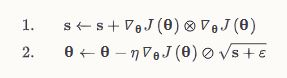

- The first step accumulates the square of the gradients into the vector s and the second step scales the learning rate by square root of s.
- In short, this algorithm decays the learning rate, but it does so faster for steep dimensions than for dimensions with gentler slopes. This is called an *adaptive learning rate*. It helps point the resulting updates more directly toward the global optimum. One additional benefit is that it requires much less tuning of the learning rate hyperparameter η.


- AdaGrad frequently performs well for simple quadratic problems, but it often stops too early when training neural networks: the learning rate gets scaled down so much that the algorithm ends up stopping entirely before reaching the global optimum. So never use it. Instead use:

### RMSProp:

- As we’ve seen, AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. The RMSProp algorithm⁠18 fixes this by accumulating only the gradients from the most recent iterations, as opposed to all the gradients since the beginning of training. It does so by using exponential decay (default=0.9) in the first step.


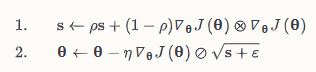

- It almost always performs much better than AdaGrad.

### Adam:

- Better adaptive learning rate algorithm than AdaGrad and RMSProp.
- Adam which stands for adaptive moment estimation, combines the ideas of momentum optimization and RMSProp: just like momentum optimization, it keeps track of an exponentially decaying average of past gradients; and just like RMSProp, it keeps track of an exponentially decaying average of past squared gradients. These are estimations of the mean and (uncentered) variance of the gradients. The mean is often called the first moment while the variance is often called the second moment.

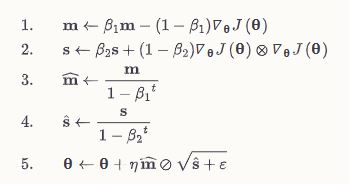

- Steps 3 and 4 are somewhat of a technical detail: since m and s are initialized at 0, they will be biased toward 0 at the beginning of training, so these two steps will help boost m and s at the beginning of training.
- The momentum decay hyperparameter β1 is typically initialized to 0.9, while the scaling decay hyperparameter β2 is often initialized to 0.999. As earlier, the smoothing term ε is usually initialized to a tiny number such as 10–7.
- Since Adam is an adaptive learning rate algorithm, like AdaGrad and RMSProp, it requires less tuning of the learning rate hyperparameter η. You can often use the default value η = 0.001, making Adam even easier to use than gradient descent

### AdaMax:

- Sometimes more stable than Adam but generaly not better.
- if we ignore ε and steps 3 and 4, Adam scales down the parameter updates by the square root of s. In short, Adam scales down the parameter updates by the ℓ2 norm of the time-decayed gradients (recall that the ℓ2 norm is the square root of the sum of squares).
- AdaMax replaces the ℓ2 norm with the ℓ∞ norm (a fancy way of saying the max)


### Nadam:

- Nadam optimization is Adam optimization plus the Nesterov trick, so it will often converge slightly faster than Adam.

### AdamW:

- AdamW is a variant of Adam that integrates a regularization technique called weight decay.
- Weight decay reduces the size of the model’s weights at each training iteration by multiplying them by a decay factor such as 0.99. This may remind you of ℓ2 regularization, which also aims to keep the weights small, and indeed it can be shown mathematically that ℓ2 regularization is equivalent to weight decay when using SGD.
- However, when using Adam or its variants, ℓ2 regularization and weight decay are not equivalent: in practice, combining Adam with ℓ2 regularization results in models that often don’t generalize as well as those produced by SGD. AdamW fixes this issue by properly combining Adam with weight decay.

### Summary:

*Adaptive optimization methods (including RMSProp, Adam, AdaMax, Nadam, and AdamW optimization) are often great, converging fast to a good solution. However, they can lead to solutions that generalize poorly on some datasets. So when you are disappointed by your model’s performance, try using NAG instead: your dataset may just be allergic to adaptive gradients.*

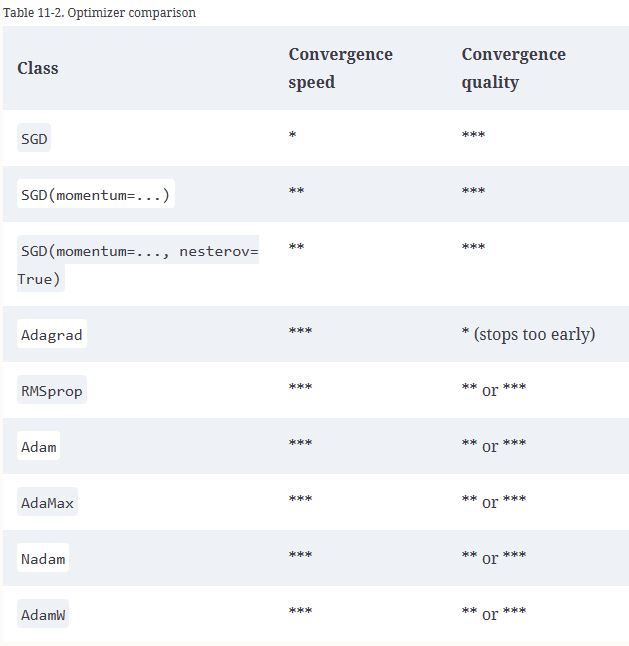

## Training sparse models

All the optimization algorithms we just discussed produce dense models, meaning that most parameters will be nonzero. If you need a blazingly fast model at runtime, or if you need it to take up less memory, you may prefer to end up with a sparse model instead.

One way to achieve this is to train the model as usual, then get rid of the tiny weights (set them to zero). However, this will typically not lead to a very sparse model, and it may degrade the model’s performance.

A better option is to apply strong ℓ1 regularization during training, as it pushes the optimizer to zero out as many weights as it can (as in “Lasso Regression”).

If these techniques remain insufficient, check out the TensorFlow Model Optimization Toolkit (TF-MOT), which provides a pruning API capable of iteratively removing connections during training based on their magnitude.

## Learning Rate Scheduling

### Power Scheduling:

```python
earning_rate = initial_learning_rate / (1 + decay_rate * step / decay_steps)
```

- The learning rate first drops quickly and then more and more slowly.
- Use `tf.keras.optimizers.schedules.InverseTimeDecay`

### Exponential scheduling:
```python
learning_rate = initial_learning_rate * decay_rate ** (step / decay_steps)
```

- The learning rate drops very fast by the factor of `decay_rate` every `decay_steps` steps
- Use `tf.keras.optimizers.schedules.ExponentialDecay`

### Piecewise constant scheduling:
- Using constant learning rate which is different for different ranges of epochs.
- Use `tf.keras.optimizers.schedules.PiecewiseConstantDecay`

### Performance scheduling:
- Reduces the learning rate by factor of λ if validation error does not drops for N steps.
- Use `ReduceLROnPlateau` callback

### 1cycle scheduling:
- Increase the learning rate linearly to max learning rate during about half of training, then reduce it linearly back to the initial learning rate, and lastly reduce it down to close to zero linearly for the very last part of training.
- On CIFAR10 dataset, this approach reached 91.9% accuracy in just 100 epochs, compared to 90.3% accuracy in 800 epochs through standard approach.

- Use custom callback.

Exponential scheduling and Performance scheduling are recommended. But 1cycle scheduling seems to perform even better.



## Avoiding Overfitting through regularization

### Early Stopping

### Batch Normalization

### l1 and l2 regularization:

- Use `l1()`, `l2()` or `l1_l2()` from `tf.keras.regularizers`.
- l2 is fine with SGD, momentum optimization and nesterov momentum optimization, but not with Adam and its variants. If you want to use Adam with weight decay, then do not use l2 regularization: use AdamW instead.

### Dropout:
- At every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being temporarily "dropped out", meaning it will be entirely ignored during this training step, but it may be active during the next step. The hyperparameter p is called the dropout rate, and it is typically set between 10% and 50%: closer to 20%-30% in recurrent neural nets, and closer to 40%-50% in convolutional neural networks. After training, neurons don't get dropped anymore

- Neurons trained with dropout cannot co-adapt with their neighboring neurons; they have to be as useful as possible on their own. They also cannot rely excessively on just a few input neurons; they must pay attention to each of their input neurons. They end up being less sensitive to slight changes in the inputs. In the end, you get a more robust net- work that generalizes better.

- Suppose p = 75%: on average only 25% of all neurons are active at each step during training. This means that after training, a neuron would be connected to four times as many input neurons as it would be during training. To compensate for this fact, we need to multiply each neuron's input connection weights by four during training. If we don't, the neural network will not perform well as it will see different data during and after training. More generally, we need to divide the connection weights by the keep probability (1 - p) during training.

- Since dropout is only active during training, comparing the training loss and the validation loss can be misleading. In particular, a model may be overfitting the training set and yet have similar training and validation losses. So, make sure to evaluate the training loss without dropout (e.g., after training).

- Many state-of-the-art architectures only use dropout after the last hidden layer, so you may want to try this if full dropout is too strong.

- Dropout does tend to significantly slow down convergence, but it often results in a better model when tuned properly. So, it is generally well worth the extra time and effort, especially for large models.

- If you want to regularize a self-normalizing network based on the SELU activation function, you should use alpha dropout: this is a variant of dropout that pre- serves the mean and standard deviation of its inputs. It was introduced in the same paper as SELU, as regular dropout would break self-normalization.



### MC dropout:

- MC dropout can boost the performance of any trained dropout model without having to retrain it or even modify it at all. It also provides a much better measure of the model's uncertainty, and it can be implemented in just a few lines of code.

- ```python
N = 100
y_probas = np.stack([model(X_test, training=True) for sample in range(N)])
# y_probas size = [N, B, C]
y_proba = y_probas.mean(axis=0)
y_proba_std = y_probas.std(axis=0)
```

- Averaging over multiple predictions with dropout turned on gives us Monte Carlo estimate that is more reliable than result of single prediction with dropout turned off.
- The number of Monte Carlo samples you use (100 in this example) is a hyperparameter you can tweak. The higher it is, the more accurate the predictions and their uncertainty estimates will be. However, if you double it, inference time will also be doubled.

- If your model contains other layers that behave in a special way during training (such as BatchNormalization layers), then you should not force training mode like we just did. Instead, you should replace the Dropout layers with the following MCDropout class:
```python
class MCDropout (tf.keras.layers.Dropout):
    def call(self, inputs, training=False):
        return super().call(inputs, training=True)
```


### Max-Norm regularization:

- For each neuron, it constrains the weights w of the incoming con- nections such that || w ||^2 ≤r, where r is the max-norm hyperparameter and || - ||^2 is the 12 norm.

- Max-norm regularization does not add a regularization loss term to the overall loss function. Instead, it is typically implemented by computing || w ||^2 after each training step and rescaling w if needed (w <-- wr / || w ||^2).
- Reducing r increases the amount of regularization and helps reduce overfitting. Max-norm regularization can also help alleviate the unstable gradients problems (if you are not using batch normalization).
- To implement max-norm regularization in Keras, set the `kernel_constraint` argument of each hidden layer to a `max_norm()` constraint with the appropriate max value.
- The max_norm() function has an axis argument that defaults to 0. A Dense
layer usually has weights of shape [number of inputs, number of neurons], so using axis=0 means that the max-norm constraint will apply independently to each neuron's weight vector.

## Summary:

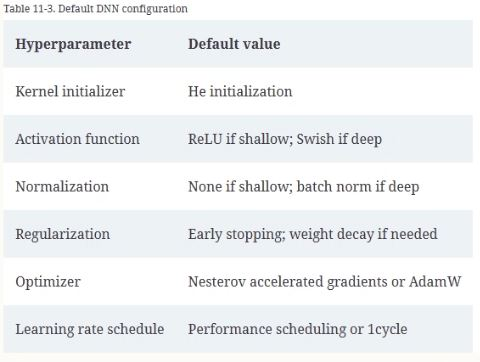

For self-normalizing DNN net:

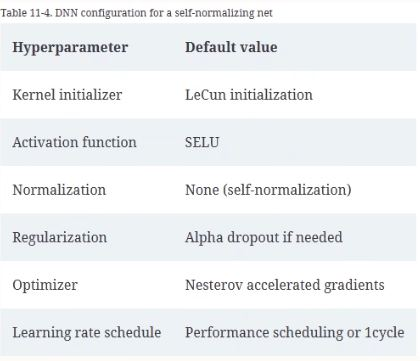

If you need a low-latency model (one that performs lightning-fast predic- tions), you may need to use fewer layers, use a fast activation function such as ReLU or leaky ReLU, and fold the batch normalization layers into the previous layers after training. Having a sparse model (by using l1 regularization) will also help. Finally, you may want to reduce the float precision from 32 bits to 16 or even 8 bits. Check *Tensorflow Model Optimization*.

# Custom Models and Training:

- `tf.Constant` (tf.tensor) is immutable supporting many functions like numpy.
- `tf.Varaible` is mutable supporting in-place modifications using assign, assign_add etc.
- `Model.save()` saves the `model.loss`, `model.optimizer` etc configuration using their `get_config()` method which returns directory of params. When loading the model, the same object is created using their class `from_config()` method.
- Pass the custom models used while loading the model
```python
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return base_config | {"threshold": self.threshold}

    model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])
    model.save("my_model_with_a_custom_loss_class")
    model = tf.keras.models.load_model("my_model_with_a_custom_loss_class",
                                   custom_objects={"HuberLoss": HuberLoss})
```

- Alternative to `custom_objects`, `@tf.keras.utils.register_keras_serializable(package='Custom', name=)` can be used.
- Regularizers, Initializers and Constraints Base Classes don't have `call()`. Also they don't have `get_config` method.

- Metric Base class can be used for *streaming metric* like other available metrics. It does not have `call` method. In its `__call__`, `update_state` is first called to update variables e.g. total false postives and true negatives since the start of epoch, then `result` method is called to output metric e.g. running precision instead of average of precision across all the batches.

- ```python
    class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)  # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
```



- For simple custom layers having no weights, use `tf.keras.layers.Lambda`
- ```python
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="he_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": tf.keras.activations.serialize(self.activation)}
```
- `__call__` method will `build` and then `call`. `call` will include `training=None` parameter to distingusih training and inference when using Dropout of BN. `call` can have multiple inputs and multiple outputs.
- State variables of layer can also be defined in `__init__` method instead.

- Overriding `get_config` is usually not important for Layer and its subclasses. The default will already include the important parameters to reinstantiate the object.
- You can save and load the model without specifying the custom object for layer.
- `Model` is a subclass of `Layer` containing extra functionality of methods:
`get_layer`, `fit`, `compile`, `evaluate`, `predict`, `save`, `load_model` and `clone_model`, `save_weights`, `load_weights` etc.

- ```python
    class ResidualBlock(tf.keras.layers.Layer):
        def __init__(self, n_layers, n_neurons, **kwargs):
            super().__init__(**kwargs)
            self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu",
                                                kernel_initializer="he_normal")
                        for _ in range(n_layers)]

        def call(self, inputs):
            Z = inputs
            for layer in self.hidden:
                Z = layer(Z)
            return inputs + Z

    class ResidualRegressor(tf.keras.Model):
        def __init__(self, output_dim, **kwargs):
            super().__init__(**kwargs)
            self.hidden1 = tf.keras.layers.Dense(30, activation="relu",
                                                kernel_initializer="he_normal")
            self.block1 = ResidualBlock(2, 30)
            self.block2 = ResidualBlock(2, 30)
            self.out = tf.keras.layers.Dense(output_dim)

        def call(self, inputs):
            Z = self.hidden1(inputs)
            for _ in range(1 + 3):
                Z = self.block1(Z)
            Z = self.block2(Z)
            return self.out(Z)

    tf.keras.utils.set_random_seed(42)
    model = ResidualRegressor(1)
    model.compile(loss="mse", optimizer="nadam")
    history = model.fit(X_train_scaled, y_train, epochs=2)
    score = model.evaluate(X_test_scaled, y_test)
    model.save("my_custom_model")

    model = tf.keras.models.load_model("my_custom_model")
    history = model.fit(X_train_scaled, y_train, epochs=2)
    model.predict(X_test_scaled[:3])
```

- We can add loses and metrics based on model internels using `add_loss` and `add_metric`. For example adding reconstruction error from auxiliary output, which acts as regularization cost along with custom metric:

    ```python
    class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            self.add_metric(recon_loss, name="rc_loss")
            # Or use streaming metric, first initialized as attribute of self
        return self.out(Z)
    ```

- Using reverse-mode autodiff, we can find the gradient of $f(w_1, w_2)$ with respect to each parameter $w$ in one reverse pass. This is much efficient then computing gradient for each parameter individualy using, for example, $[f(w_1+δ, w_2)-f(w_1, w_2)]/ δ$ for $w_1$.



In [ ]:
import tensorflow as tf
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [ ]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

- In order to save memory, only put the strict minimum inside the `tf.GradientTape()` block. Alternatively, pause recording by creating a with `tape.stop_recording()` block inside the `tf.GradientTape()` block.

- The tape is automatically erased immediately after you call its `gradient()` method, so you will get an exception if you try to call `gradient()` twice. In order to use `gradient()` more than once, use persistant and delete tape once done to free resources:

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)  # returns tensor 36.0
dz_dw2 = tape.gradient(z, w2)  # returns tensor 10.0, works fine now!
del tape

- If you want to track Tensor then you need to watch it:

In [ ]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

- This can be useful in some cases, like if you want to implement a regularization loss that penalizes activations that vary a lot when the inputs vary little: the loss will be based on the gradient of the activations with regard to the inputs. Since the inputs are not variables, you'll need to tell the tape to watch them.

- You can find the first partial derivative (jacobian) and second partial derivative (hessian):

In [ ]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [ ]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [ ]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In some cases you may want to stop gradients from backpropagating through some part of your neural network. To do this, you must use the
`tf.stop_gradient()` function. The function returns its inputs during the forward pass (like `tf.identity()`), but it does not let gradients through during backpropagation (it acts like a constant):

In [ ]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)  # same result as without stop_gradient()

gradients = tape.gradient(z, [w1, w2])

In [ ]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

The exponential function is also a frequent source of headaches, as it grows extremely fast. For very large number or number with many float values, number will be `inf` as it does not fit in 32 bits. For example, the `softplus()` will output `inf` rather than 100.0 at 100.0.

In [ ]:
def softplus(z):
    return tf.math.log(tf.exp(tf.constant(z, dtype=tf.float32)) + 1.)

softplus(100.)

<tf.Tensor: shape=(), dtype=float32, numpy=inf>

You can rewrite the function to make it numerically stable:

In [ ]:
def softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

softplus(100.)

<tf.Tensor: shape=(), dtype=float32, numpy=100.0>

In some rare cases, a numerically stable function may still have numerically unstable gradients. In such cases, you will have to tell TensorFlow which equation to use for the gradients, rather than letting it use autodiff. For this, you must use the `@tf.custom_gradient` decorator when defining the function, and return both the function's usual result and a function that computes the gradients. For example, let's update the `softplus()` function to also return a numerically stable gradients function:

In [ ]:
@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads):  # grads = backprop'ed from upper layers
        return grads * (1 - 1 / (1 + tf.exp(z)))  # stable grads of softplus

    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
    return result, my_softplus_gradients

Note that this function will receive as input the gradients that were backpropagated so far, down to the `softplus()` function, and according to the chain rule we must multiply them with this function's gradients.

In [ ]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

- Custom training loop:

In [ ]:
from tqdm.notebook import trange
from collections import OrderedDict
import numpy as np
import tensorflow as tf

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
tf.keras.utils.set_random_seed(42)
l2_reg = tf.keras.regularizers.l2(0.05)
max_norm = tf.keras.constraints.max_norm(2)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          kernel_regularizer=l2_reg, kernel_constraint=max_norm),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [ ]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.MeanAbsoluteError()]

def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [ ]:
from tqdm.notebook import trange
from collections import OrderedDict
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train_scaled, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                    # model.losses is list containing regularization cost for each layer

                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))

                # Applying constraints
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))

                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()

                steps.set_postfix(status)

        for metric in [mean_loss] + metrics:
            metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/362 [00:00<?, ?it/s]

- Creating a dynamic Keras model can be useful for debugging, as it will not compile any custom component to a TF Function, and you can use any Python debugger to debug your code. It can also be useful if you want to include arbitrary Python code in your model (or in your training code), including calls to external libraries which are not TF operations and hence only executed once during tracing and not included in graph as node. To make a model dynamic, you must set `dynamic=True` when creating it. Alternatively, you can set `run_eagerly=True` when calling the model's `compile()` method. Making a model dynamic prevents Keras from using any of TensorFlow's graph features, so it will slow down training and inference, and you will not have the possibility to export the computation graph, which will limit your model's portability.

# Data loading and preprocessing

## tf.data API

In [ ]:
import tensorflow as tf

- tf.data is streaming API: you can iterate through dataset's items but not index or slice.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)) # slice along first dimension
# Alternatively use tf.data.Dataset.range(10) for same result but with dtype=int64
for i in dataset:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [ ]:
# It slices such that structure remains same
X_nested = {"a": ([1, 2, 3], [4, 5, 6]), "b": [7, 8, 9]}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)
for item in dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


## Chaining transformations:

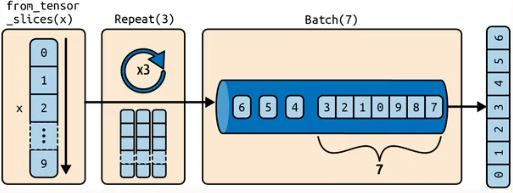

- Repeat data for n times without copying it in memory n times. Without any agument to `repeat()`, dataset is repeated infinite times.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3)
for i in dataset.take(20): # .take() is like .head()
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7)
# use drop_remainder=True in batch() in order to drop remaining
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [ ]:
dataset = dataset.map(lambda x: x * 2, num_parallel_calls=tf.data.AUTOTUNE)  # x is a batch
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [ ]:
dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 50)
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


In [ ]:
# Combining all transformations:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7).map(lambda x: x * 2, num_parallel_calls=-1).filter(lambda y: tf.reduce_sum(y) > 50)
for i in dataset:
    print(i)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


## Shuffling

- `shuffle()` method will create a new dataset that will start by filling up a buffer with the first items of the source dataset. Then, whenever it is asked for an item, it will pull one out randomly from the buffer and replace it with a fresh one from the source dataset, until it has iterated entirely through the source dataset. At this point it will continue to pull out items randomly from the buffer until it is empty. You must specify the buffer size, and it is important to make it large enough, or else shuffling will not be very effective.Just don't exceed the amount of RAM you have, though even if you have plenty of it, there's no need to go beyond the dataset's size.

In [ ]:
dataset = tf.data.Dataset.range(10).repeat(2)
dataset = dataset.shuffle(buffer_size=4, seed=42)
for item in dataset:
    print(item)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


- For a large dataset that does not fit in memory, this simple shuffling-buffer approach may not be sufficient, since the buffer will be small compared to the dataset. For example:

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([1,1,1,1,1,1,4,4,4,4,4,4])
dataset = dataset.shuffle(buffer_size=2, seed=42)
for item in dataset:
    print(item)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


- For large datasets, a common approach is to split the source data into multiple files, then read them in a random order during training. However, instances located in the same file will still end up close to each other. To avoid this you can pick multiple files randomly and read them simultaneously, **interleaving** their records:

In [ ]:
# let's start by splitting the housing dataset and saving it to 20 CSV files:
import numpy as np
import os
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
data = np.c_[housing.data, housing.target]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

data_train, data_temp = train_test_split(data, random_state=42, test_size=0.3)
data_valid, data_test = train_test_split(data_temp, random_state=42, test_size=0.5)
data_train.shape, data_valid.shape, data_test.shape

((14448, 9), (3096, 9), (3096, 9))

In [ ]:
def save_to_csv_files(data, name, n_parts=10, header=None):
    dir = os.path.join("housing", name)
    os.makedirs(dir, exist_ok=True)
    filepaths = []
    for file_num, chunk in enumerate(np.array_split(data, n_parts)):
        filename = f"{name}_{file_num}.csv"
        filepath = os.path.join(dir, filename)
        filepaths.append(filepath)
        with open(filepath, "w") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row in chunk:
                f.write(",".join(map(str, row)))
                f.write("\n")
    return filepaths

train_filepaths = save_to_csv_files(data_train, "train", n_parts=20, header=header)
valid_filepaths = save_to_csv_files(data_train, "valid", n_parts=10, header=header)
test_filepaths = save_to_csv_files(data_train, "test", n_parts=10, header=header)

In [ ]:
train_filepaths

['housing/train/train_0.csv',
 'housing/train/train_1.csv',
 'housing/train/train_2.csv',
 'housing/train/train_3.csv',
 'housing/train/train_4.csv',
 'housing/train/train_5.csv',
 'housing/train/train_6.csv',
 'housing/train/train_7.csv',
 'housing/train/train_8.csv',
 'housing/train/train_9.csv',
 'housing/train/train_10.csv',
 'housing/train/train_11.csv',
 'housing/train/train_12.csv',
 'housing/train/train_13.csv',
 'housing/train/train_14.csv',
 'housing/train/train_15.csv',
 'housing/train/train_16.csv',
 'housing/train/train_17.csv',
 'housing/train/train_18.csv',
 'housing/train/train_19.csv']

In [ ]:
# Create ShuffleDataset of filepaths
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, shuffle=True, seed=42)
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'housing/train/train_13.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_6.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_1.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_7.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_0.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_4.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_18.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_10.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_2.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_9.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_15.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_17.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_3.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_5.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_19.csv', shape=(), dtype=string)
tf.Tensor(b'housing/train/train_8.

In [ ]:
csv_data = tf.data.TextLineDataset(filepath_dataset)
for row in csv_data.take(5):
    print(row)

tf.Tensor(b'MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue', shape=(), dtype=string)
tf.Tensor(b'6.0224,38.0,5.1,1.2,41.0,4.1,33.8,-117.89,1.875', shape=(), dtype=string)
tf.Tensor(b'3.8108,23.0,5.4393162393162395,0.9623931623931624,1525.0,2.606837606837607,36.35,-119.64,0.904', shape=(), dtype=string)
tf.Tensor(b'3.125,42.0,4.012820512820513,0.9166666666666666,625.0,4.006410256410256,33.98,-118.22,1.663', shape=(), dtype=string)
tf.Tensor(b'3.1484,52.0,5.354748603351955,1.0251396648044693,722.0,2.016759776536313,38.57,-121.46,1.589', shape=(), dtype=string)


- `interleave` will apply `map_func` to `cycle_length` input elements, open iterators on the returned `Dataset` objects, and cycle through them producing `block_length` consecutive elements from each iterator, and consuming the next input element each time it reaches the end of an iterator.

In [ ]:
dataset = filepath_dataset.interleave(lambda filepath: tf.data.TextLineDataset(filepath),
                                      cycle_length=5, block_length=2, num_parallel_calls=tf.data.AUTOTUNE)
for row in dataset.take(13):
    print(row)

tf.Tensor(b'MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue', shape=(), dtype=string)
tf.Tensor(b'5.3146,33.0,5.201183431952662,1.0710059171597632,547.0,3.2366863905325443,33.92,-118.09,1.686', shape=(), dtype=string)
tf.Tensor(b'MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue', shape=(), dtype=string)
tf.Tensor(b'11.5706,36.0,7.68213058419244,1.0618556701030928,1315.0,2.259450171821306,37.87,-122.47,5.00001', shape=(), dtype=string)
tf.Tensor(b'MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue', shape=(), dtype=string)
tf.Tensor(b'2.5685,20.0,4.7950738916256155,1.0,1725.0,1.6995073891625616,38.41,-122.4,2.676', shape=(), dtype=string)
tf.Tensor(b'MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue', shape=(), dtype=string)
tf.Tensor(b'2.925,43.0,4.85655737704918,1.2131147540983607,933.0,3.8237704918032787,37.35,-121.89,1.

- It reads 2 rows from each 5 files, sequentially.

## Putting Everything Together + Prefetching

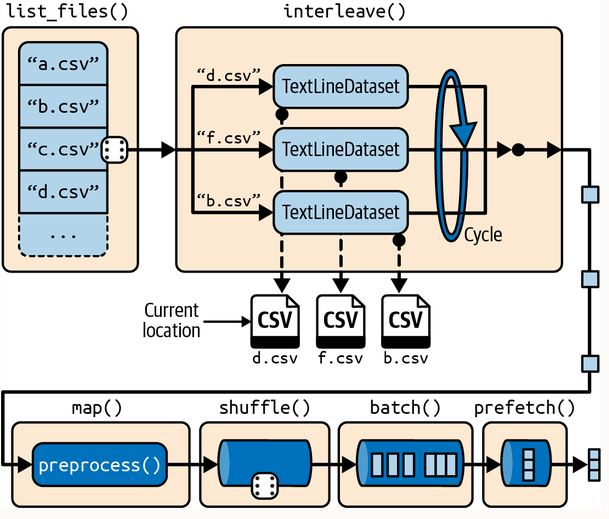

In [ ]:
n_inputs = 8
def preprocess(line):
    # Replace missing feature with 0 but give error on missing target
    defs = [tf.constant(0.)] * n_inputs + [tf.constant([])]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    # Stacking 0d tensors into 1D tensor
    return tf.stack(fields[:-1]), tf.stack(fields[-1:])

In [ ]:
def csv_reader_dataset(filepaths, n_readers=5, n_read_threads=None,
                       n_parse_threads=5, shuffle_buffer_size=10_000, seed=42,
                       batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    return dataset.batch(batch_size).prefetch(1) # 1 or use tf.data.AUTOTUNE

In [ ]:
train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 2.7736001e+00  2.0000000e+01  7.5446925e+00  1.6005586e+00
   8.9200000e+02  2.4916201e+00  4.0849998e+01 -1.2245000e+02]
 [ 1.9694000e+00  1.4000000e+01  6.8537455e+00  1.1961950e+00
   1.8760000e+03  2.2306778e+00  3.4049999e+01 -1.1707000e+02]
 [ 3.9916999e+00  2.5000000e+01  5.5763636e+00  1.0345454e+00
   1.6020000e+03  2.9127274e+00  3.8330002e+01 -1.2282000e+02]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.078]
 [1.732]
 [2.441]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[ 1.7800000e+00  3.8000000e+01  3.9756944e+00  1.1250000e+00
   5.9600000e+02  2.0694444e+00  3.8570000e+01 -1.2148000e+02]
 [ 4.1118002e+00  5.0000000e+00  4.9900990e+00  1.2959296e+00
   2.4850000e+03  2.7337735e+00  3.4049999e+01 -1.1780000e+02]
 [ 2.6015999e+00  1.4000000e+01  4.6989732e+00  1.1047227e+00
   6.0680000e+03  2.4919918e+00  3.8680000e+01 -1.2128000e+02]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.143]
 [1.259]
 [1.212]], shape=(3, 1), dtype=float32)



- By calling `prefetch(1)` at the end, we are creating a dataset that will do its best to always be one batch ahead.In other words, while our training algorithm is working
on one batch, the dataset will already be working in parallel on getting the next batch
ready (e.g., reading the data from disk and preprocessing it). This can improve performance dramatically. If we also ensure that loading
and preprocessing are multithreaded (by setting num_parallel_calls when calling
interleave() and map()), we can exploit multiple cores on the CPU and hopefully
make preparing one batch of data shorter than running a training step on the GPU: this way the GPU will be almost 100% utilized and training will run much faster.


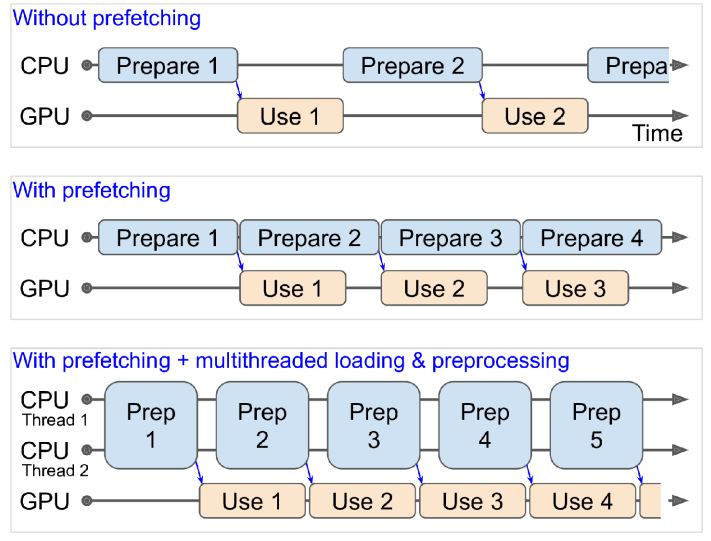

- Now you can use the `fit()` method on Dataset. It will handle repeating the dataset for each epoch with different random order.
- If the dataset is small enough to fit in memory, you can significantly speed up training by using the dataset’s cache() method to cache its content to RAM. You should generally do this after loading and preprocessing the data, but before shuffling, repeating, batching, and prefetching. This way, each instance will only be read and preprocessed once (instead of once per epoch), but the data will still be shuffled differently at each epoch, and the next batch will still be prepared in advance.

## Keras preprocessing layers

### The `Normalization` Layer

In [ ]:
norm_layer = tf.keras.layers.Normalization()
X_train = data_train[:, :-1]
norm_layer.adapt(X_train)

In [ ]:
normal_train_set = train_set.map(lambda X, y: (norm_layer(X), y))

In [ ]:
list(normal_train_set.take(1))

[(<tf.Tensor: shape=(3, 8), dtype=float32, numpy=
  array([[ 0.66373473, -0.83843696,  0.4041371 , -0.08990226,  0.01848155,
          -0.02645466,  0.655217  , -1.2611353 ],
         [ 0.39274105,  0.35079363,  0.18729788, -0.03611717, -0.42004362,
          -0.02783295,  1.1983724 , -1.3709788 ],
         [ 2.0989196 ,  0.11294751,  0.8611418 , -0.26046097, -0.7936671 ,
          -0.05640738, -0.8244133 ,  0.8358633 ]], dtype=float32)>,
  <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
  array([[3.158],
         [2.286],
         [3.519]], dtype=float32)>)]

### The `Discretization` Layer

The Discretization layer’s goal is to transform a numerical feature into a categorical feature by mapping value ranges (called bins) to categories. This is sometimes useful for features with multimodal distributions, or with features that have a highly non-linear relationship with the target.

In [ ]:
age = tf.constant([[10.], [93.], [57.], [18.], [37.], [5.]])
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18., 50.])
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [2],
       [2],
       [1],
       [1],
       [0]])>

In [ ]:
discretize_layer = tf.keras.layers.Discretization(num_bins=3)
discretize_layer.adapt(age)
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [1],
       [2],
       [0]])>

In [ ]:
discretize_layer.bin_boundaries

ListWrapper([10.0, 36.999996185302734])

### The `CategoryEncoding` Layer

Encode integer categories

In [ ]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [ ]:
two_age_categories = np.array([[1, 0], [2, 2], [2, 0]])
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]], dtype=float32)>

### The `StringLookup` Layer

In [ ]:
cities = ["Auckland", "Paris", "Paris", "San Francisco"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(cities)
str_lookup_layer.get_vocabulary()

['[UNK]', 'Paris', 'San Francisco', 'Auckland']

In [ ]:
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[1],
       [3],
       [3],
       [0]])>

Unknown categories get mapped to 0, as is the case for “Montreal” in this example. The known categories are numbered starting at 1, from the most frequent category to the least frequent.

By default, it would then map all unknown to category 0, making them indistinguishable by the model. To reduce this risk (while still adapting the layer only on a subset of the training set), you can set num_oov_indices to an integer greater than 1. This is the number of out-of-vocabulary (OOV) buckets to use: each unknown category will get mapped pseudorandomly to one of the OOV buckets, using a hash function modulo the number of OOV buckets. This will allow the model to distinguish at least some of the rare categories.

In [ ]:
str_lookup_layer = tf.keras.layers.StringLookup(num_oov_indices=5)
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Foo"], ["Bar"], ["Baz"]])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[5],
       [7],
       [4],
       [3],
       [4]])>

In [ ]:
str_lookup_layer.get_vocabulary()

['[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 'Paris',
 'San Francisco',
 'Auckland']

"Foo" and "Baz" happen to be mapped to the same bucket (with ID 4), so they remain indistinguishable by the model. This is called a hashing collision.

For one-hot encoding:

In [ ]:
str_lookup_layer = tf.keras.layers.StringLookup(output_mode="one_hot")
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)>

### Encoding Categorical Features Using Embeddings

- An embedding is a dense representation of some higher-dimensional data, such as a category, or a word in a vocabulary. If there are 50,000 possible categories, then one-hot encoding would produce a 50,000-dimensional sparse vector (i.e., containing mostly zeros). In contrast, an embedding would be a comparatively small dense vector; for example, with just 100 dimensions.

- In deep learning, embeddings are usually initialized randomly, and they are then trained by gradient descent, along with the other model parameters. For example, the "NEAR BAY" category in the California housing dataset could be represented initially by a random vector such as [0.131, 0.890], while the "NEAR OCEAN" category might be represented by another random vector such as [0.631, 0.791]. In this example, we use 2D embeddings, but the number of dimensions is a hyperparameter you can tweak.

- Since these embeddings are trainable, they will gradually improve during training; and as they represent fairly similar categories in this case, gradient descent will certainly end up pushing them closer together, while it will tend to move them away from the "INLAND" category’s embedding.

- Indeed, the better the representation, the easier it will be for the neural network to make accurate predictions, so training tends to make embeddings useful representations of the categories. This is called representation learning

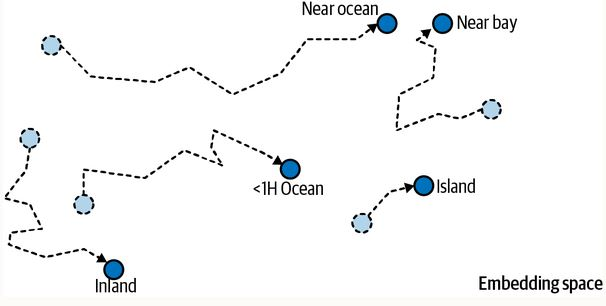

- Not only will embeddings generally be useful representations for the task at hand, but quite often these same embeddings can be reused successfully for other tasks. The most common example of this is word embeddings (i.e., embeddings of individual words): when you are working on a natural language processing task, you are often better off reusing pretrained word embeddings than training your own.

- The idea of using vectors to represent words dates back to the 1960s, and many sophisticated techniques have been used to generate useful vectors, including using neural networks. But things really took off in 2013, when Tomáš Mikolov and other Google researchers published a paper describing an efficient technique to learn word embeddings using neural networks, significantly outperforming previous attempts. This allowed them to learn embeddings on a very large corpus of text: they trained a neural network to predict the words near any given word and obtained astounding word embeddings. For example, synonyms had very close embeddings, and semantically related words such as France, Spain, and Italy ended up clustered together.

- It’s not just about proximity, though: word embeddings were also organized along meaningful axes in the embedding space. Here is a famous example: if you compute King – Man + Woman (adding and subtracting the embedding vectors of these words), then the result will be very close to the embedding of the word Queen. In other words, the word embeddings encode the concept of gender! Similarly, you can compute Madrid – Spain + France, and the result is close to Paris, which seems to show that the notion of capital city was also encoded in the embeddings.

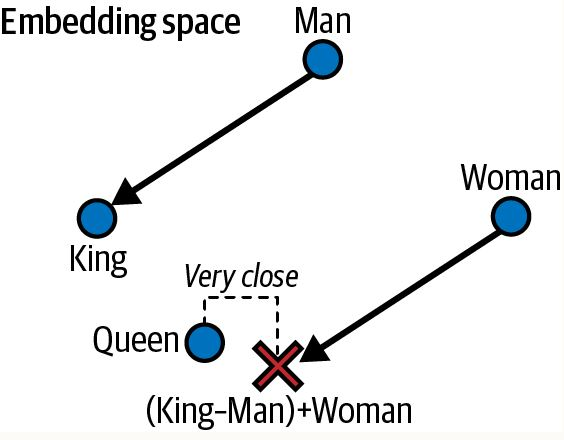

Keras provides an Embedding layer, which wraps an embedding matrix: this matrix has one row per category and one column per embedding dimension. By default, it is initialized randomly. To convert a category ID to an embedding, the Embedding layer just looks up and returns the row that corresponds to that category.

In [ ]:
tf.random.set_seed(42)
embedding_layer = tf.keras.layers.Embedding(input_dim=5, output_dim=2)
embedding_layer(np.array([2, 4, 2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.0317896 ,  0.01799372],
       [ 0.00489038, -0.01888341],
       [-0.0317896 ,  0.01799372]], dtype=float32)>

An Embedding layer is initialized randomly, so it does not make sense to use it outside of a model as a standalone preprocessing layer unless you initialize it with pretrained weights.

In [ ]:
import numpy as np

In [ ]:
tf.keras.utils.set_random_seed(42)
ocean_prox = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(ocean_prox)
lookup_and_embed = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[], dtype=tf.string),  # WORKAROUND
    str_lookup_layer,
    tf.keras.layers.Embedding(input_dim=str_lookup_layer.vocabulary_size(),
                              output_dim=2)
], name="embeding")
lookup_and_embed(np.array(["<1H OCEAN", "ISLAND", "<1H OCEAN"]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.04135817, -0.00536425],
       [ 0.04704999, -0.03320879],
       [-0.04135817, -0.00536425]], dtype=float32)>

One-hot encoding followed by a Dense layer (with no activation function and no biases) is equivalent to an Embedding layer. However, the Embedding layer uses way fewer computations as it avoids many multiplications by zero—the performance difference becomes clear when the size of the embedding matrix grows. The Dense layer’s weight matrix plays the role of the embedding matrix. For example, using one-hot vectors of size 20 and a Dense layer with 10 units is equivalent to using an Embedding layer with input_dim=20 and output_dim=10. As a result, it would be wasteful to use more embedding dimensions than the number of units in the layer that follows the Embedding layer.

In [ ]:
# Training embedding for random dataset:
tf.random.set_seed(42)
np.random.seed(42)
X_train_num = np.random.rand(10_000, 8)
X_train_cat = np.random.choice(ocean_prox, size=10_000)
y_train = np.random.rand(10_000, 1)
X_valid_num = np.random.rand(2_000, 8)
X_valid_cat = np.random.choice(ocean_prox, size=2_000)
y_valid = np.random.rand(2_000, 1)

num_input = tf.keras.layers.Input(shape=[8], name="num")
cat_input = tf.keras.layers.Input(shape=[], dtype=tf.string, name="cat")
cat_embeddings = lookup_and_embed(cat_input)
encoded_inputs = tf.keras.layers.concatenate([num_input, cat_embeddings])
outputs = tf.keras.layers.Dense(1)(encoded_inputs)
model = tf.keras.models.Model(inputs=[num_input, cat_input], outputs=[outputs])
model.compile(loss="mse", optimizer="sgd")
history = model.fit((X_train_num, X_train_cat), y_train, epochs=5,
                    validation_data=((X_valid_num, X_valid_cat), y_valid))

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1818 - val_loss: 0.1428
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1190 - val_loss: 0.1061
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0969 - val_loss: 0.0926
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0888 - val_loss: 0.0874
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - val_loss: 0.0852


In [ ]:
# learned embedings
model.get_layer("embeding")(np.array(["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]))

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.0411645 , 0.01646275],
       [0.04927193, 0.00886516],
       [0.02631925, 0.03564743],
       [0.02230128, 0.02813697],
       [0.0515095 , 0.00220331]], dtype=float32)>

### Text Preprocessing

In [ ]:
train_data = ["To be", "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer = tf.keras.layers.TextVectorization() # default is ordinal encoding
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 1, 0, 0],
       [6, 2, 1, 2]])>

In [ ]:
text_vec_layer.get_vocabulary()

['', '[UNK]', 'be', 'to', 'the', 'thats', 'question']

To construct the vocabulary, the adapt() method first converted the training sentences to lowercase and removed punctuation, which is why “Be”, “be”, and “be?” are all encoded as “be” = 2. Next, the sentences were split on whitespace, and the resulting words were sorted by descending frequency, producing the final vocabulary. When encoding sentences, unknown words get encoded as 1s. Lastly, since the first sentence is shorter than the second, it was padded with 0s.

The word IDs must be encoded, typically using an Embedding layer. Alternatively, you can set the TextVectorization layer’s output_mode argument to "multi_hot" or "count" to get the corresponding encodings.

In [ ]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode="multi_hot")
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1.]], dtype=float32)>

In [ ]:
text_vec_layer.get_vocabulary()

['[UNK]', 'be', 'to', 'the', 'thats', 'question']

In [ ]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode="count")
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[1., 1., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 1.]], dtype=float32)>

However, simply counting words is usually not ideal: words like “to” and “the” are so frequent that they hardly matter at all, whereas, rarer words such as “basketball” are much more informative. So, rather than setting output_mode to "multi_hot" or "count", it is usually preferable to set it to "tf_idf", which stands for term-frequency × inverse-document-frequency (TF-IDF). This is similar to the count encoding, but words that occur frequently in the training data are downweighted, and conversely, rare words are upweighted. For example:

In [ ]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode="tf_idf")
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.96725637, 0.6931472 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.96725637, 1.3862944 , 0.        , 0.        , 0.        ,
        1.0986123 ]], dtype=float32)>

There are many TF-IDF variants, but the way the TextVectorization layer implements it is by multiplying each word count by a weight equal to log(1 + d / (f + 1)), where d is the total number of sentences (a.k.a., documents) in the training data and f counts how many of these training sentences contain the given word. For example, in this case there are d = 4 sentences in the training data, and the word “be” appears in f = 3 of these. Since the word “be” occurs twice in the sentence “Question: be or be?”, it gets encoded as 2 × log(1 + 4 / (1 + 3)) ≈ 1.3862944. The word “question” only appears once, but since it is a less common word, its encoding is almost as high: 1 × log(1 + 4 / (1 + 1)) ≈ 1.0986123. Note that the average weight is used for unknown words.

**Better approaches:**

This approach to text encoding is straightforward to use and it can give fairly good results for basic natural language processing tasks, but it has several important limitations: it only works with languages that separate words with spaces, it doesn’t distinguish between homonyms (e.g., “to bear” versus “teddy bear”), it gives no hint to your model that words like “evolution” and “evolutionary” are related, etc. And if you use multi-hot, count, or TF-IDF encoding, then the order of the words is lost. So what are the other options?

- One option is to use the *TensorFlow Text library*, which provides more advanced text preprocessing features than the `TextVectorization` layer..

- Yet another option is to use *pretrained language model components*. Let’s look at this now.

## Using Pretrained Language Model Components

The TensorFlow Hub library makes it easy to reuse pretrained model components in your own models, for text, image, audio, and more. These model components are called modules.

Modules typically contain both preprocessing code and pretrained weights, and they generally require no extra training (but of course, the rest of your model will certainly require training).

In [ ]:
import tensorflow_hub as hub
hub_layer = hub.KerasLayer("https://www.kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/en-dim50/versions/1",
                           input_shape=[], dtype=tf.string)

In [ ]:
sentence_embeddings = hub_layer(tf.constant(["To be", "Not to be"]))
sentence_embeddings.numpy().round(2)

array([[-0.25,  0.28,  0.01,  0.1 ,  0.14,  0.16,  0.25,  0.02,  0.07,
         0.13, -0.19,  0.06, -0.04, -0.07,  0.  , -0.08, -0.14, -0.16,
         0.02, -0.24,  0.16, -0.16, -0.03,  0.03, -0.14,  0.03, -0.09,
        -0.04, -0.14, -0.19,  0.07,  0.15,  0.18, -0.23, -0.07, -0.08,
         0.01, -0.01,  0.09,  0.14, -0.03,  0.03,  0.08,  0.1 , -0.01,
        -0.03, -0.07, -0.1 ,  0.05,  0.31],
       [-0.2 ,  0.2 , -0.08,  0.02,  0.19,  0.05,  0.22, -0.09,  0.02,
         0.19, -0.02, -0.14, -0.2 , -0.04,  0.01, -0.07, -0.22, -0.1 ,
         0.16, -0.44,  0.31, -0.1 ,  0.23,  0.15, -0.05,  0.15, -0.13,
        -0.04, -0.08, -0.16, -0.1 ,  0.13,  0.13, -0.18, -0.04,  0.03,
        -0.1 , -0.07,  0.07,  0.03, -0.08,  0.02,  0.05,  0.07, -0.14,
        -0.1 , -0.18, -0.13, -0.04,  0.15]], dtype=float32)

The hub.KerasLayer layer downloads the module from the given URL. This particular module is a sentence encoder: it takes strings as input and encodes each one as a single vector (in this case, a 50-dimensional vector). Internally, it parses the string (splitting words on spaces) and embeds each word using an embedding matrix that was pretrained on a huge corpus: the Google News 7B corpus (seven billion words long!). Then it computes the mean of all the word embeddings, and the result is the sentence embedding. To be precise, the sentence embedding is equal to the mean word embedding multiplied by the square root of the number of words in the sentence. This compensates for the fact that the mean of n random vectors gets shorter as n grows.

## TensorFlow Datasets

You can then import tensorflow_datasets, usually as tfds, then call the tfds.load() function, which will download the data you want (unless it was already downloaded earlier) and return the data as a dictionary of datasets (typically one for training and one for testing, but this depends on the dataset you choose). For example, let’s download MNIST:

In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
train_set, valid_set, test_set = tfds.load(
    name="mnist",
    split=["train[:90%]", "train[90%:]", "test"],
    as_supervised=True
)
train_set = train_set.shuffle(10_000, seed=42).batch(32).prefetch(1)
valid_set = valid_set.batch(32).cache()
test_set = test_set.batch(32).cache()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=5)
test_loss, test_accuracy = model.evaluate(test_set)

Epoch 1/5
1688/1688 [==============================] - 15s 8ms/step - loss: 9.8164 - accuracy: 0.8354 - val_loss: 5.7399 - val_accuracy: 0.8857
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 5.7245 - accuracy: 0.8789 - val_loss: 5.3142 - val_accuracy: 0.8867
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 5.1925 - accuracy: 0.8833 - val_loss: 6.7178 - val_accuracy: 0.8660
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 5.0357 - accuracy: 0.8857 - val_loss: 5.5540 - val_accuracy: 0.8953
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 5.8840 - accuracy: 0.8705


## Example

In [ ]:
import os
import tensorflow as tf

### Loading data

In [ ]:
origin = "https://ai.stanford.edu/~amaas/data/sentiment/"
filename = "aclImdb_v1.tar.gz"
filepath = tf.keras.utils.get_file(fname=filename, origin=origin+filename,
                                   cache_dir=".", extract=True)

84125825/84125825 [==============================] - 5s 0us/step


In [ ]:
def read_dir(dir):
    return [os.path.join(dir, fname) for fname in os.listdir(dir) if fname.endswith(".txt")]

train_neg = read_dir("./datasets/aclImdb/train/neg")
train_pos = read_dir("./datasets/aclImdb/train/pos")
test_valid_neg = read_dir("./datasets/aclImdb/test/neg")
test_valid_pos = read_dir("./datasets/aclImdb/test/pos")

len(train_neg), len(train_pos), len(test_valid_neg), len(test_valid_pos)

(12500, 12500, 12500, 12500)

In [ ]:
test_neg = test_valid_neg[:5000]
test_pos = test_valid_pos[:5000]
valid_neg = test_valid_neg[5000:]
valid_pos = test_valid_pos[5000:]

len(valid_neg), len(valid_pos), len(test_neg), len(test_pos)

(7500, 7500, 5000, 5000)

In [ ]:
train_neg[:10]

['./datasets/aclImdb/train/neg/12216_4.txt',
 './datasets/aclImdb/train/neg/3569_1.txt',
 './datasets/aclImdb/train/neg/3757_1.txt',
 './datasets/aclImdb/train/neg/8834_4.txt',
 './datasets/aclImdb/train/neg/10995_1.txt',
 './datasets/aclImdb/train/neg/9714_1.txt',
 './datasets/aclImdb/train/neg/2145_1.txt',
 './datasets/aclImdb/train/neg/11740_1.txt',
 './datasets/aclImdb/train/neg/11041_4.txt',
 './datasets/aclImdb/train/neg/11667_1.txt']

In [ ]:
def imdb_datasets(filepaths_pos, filepaths_neg, read_parallel_calls=tf.data.AUTOTUNE):
    data_neg = tf.data.TextLineDataset(filepaths_neg).map(lambda review: (review, 0), num_parallel_calls=read_parallel_calls)
    data_pos = tf.data.TextLineDataset(filepaths_pos).map(lambda review: (review, 1), num_parallel_calls=read_parallel_calls)
    data = tf.data.Dataset.concatenate(data_neg, data_pos)
    return data

In [ ]:
batch_size = 32

data_train = imdb_datasets(train_pos, train_neg).shuffle(25_000, seed=42).batch(batch_size).prefetch(1)
data_valid = imdb_datasets(valid_pos, valid_neg).batch(batch_size).prefetch(1)
data_test = imdb_datasets(test_pos, test_neg).batch(batch_size).prefetch(1)

#### Alternatively:

In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="imdb_reviews")
train_set, test_set = datasets["train"], datasets["test"]

In [ ]:
for example in train_set.take(1):
    print(example["text"])
    print(example["label"])

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


### TF-IDF vectorization

In [ ]:
vectorizer = tf.keras.layers.TextVectorization(max_tokens=800, output_mode="tf_idf")
sample_data = data_train.map(lambda review, label: review)
vectorizer.adapt(sample_data)

In [ ]:
vectorizer.get_vocabulary()[:10]

['[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i']

In [ ]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(data_train, epochs=5, validation_data=data_valid)

Epoch 1/5
782/782 [==============================] - 11s 6ms/step - loss: 0.4347 - accuracy: 0.8183 - val_loss: 0.4839 - val_accuracy: 0.8103
Epoch 2/5
782/782 [==============================] - 8s 7ms/step - loss: 0.3833 - accuracy: 0.8440 - val_loss: 0.3582 - val_accuracy: 0.8526
Epoch 3/5
782/782 [==============================] - 10s 10ms/step - loss: 0.3498 - accuracy: 0.8566 - val_loss: 0.3583 - val_accuracy: 0.8529
Epoch 4/5
782/782 [==============================] - 9s 7ms/step - loss: 0.3085 - accuracy: 0.8735 - val_loss: 0.3653 - val_accuracy: 0.8508
Epoch 5/5
782/782 [==============================] - 9s 8ms/step - loss: 0.2581 - accuracy: 0.8932 - val_loss: 0.4299 - val_accuracy: 0.8259


### Embedding

To compute the mean embedding for each review, and multiply it by the square root of the number of words in that review, we will need a little function. For each sentence, this function needs to compute $M \times \sqrt N$, where $M$ is the mean of all the word embeddings in the sentence (excluding padding tokens), and $N$ is the number of words in the sentence (also excluding padding tokens). We can rewrite $M$ as $\dfrac{S}{N}$, where $S$ is the sum of all word embeddings (it does not matter whether or not we include the padding tokens in this sum, since their representation is a zero vector). So the function must return $M \times \sqrt N = \dfrac{S}{N} \times \sqrt N = \dfrac{S}{\sqrt N \times \sqrt N} \times \sqrt N= \dfrac{S}{\sqrt N}$.

In [ ]:
# (Batch_size, vocabulary_size, encoding_size)
example_embeding = tf.constant([[[1., 2., 3.], [4., 5., 0.], [0., 0., 0.]],
                                [[6., 0., 0.], [0., 0., 0.], [0., 0., 0.]]])
example_embeding

<tf.Tensor: shape=(2, 3, 3), dtype=float32, numpy=
array([[[1., 2., 3.],
        [4., 5., 0.],
        [0., 0., 0.]],

       [[6., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
non_pad = tf.math.count_nonzero(example_embeding, axis=-1)
non_pad # For first sentence, first two words are non_pad

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[3, 2, 0],
       [1, 0, 0]])>

In [ ]:
n_words = tf.math.count_nonzero(non_pad, axis=-1, keepdims=True)
n_words

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[2],
       [1]])>

In [ ]:
sum_embed = tf.reduce_sum(example_embeding, axis=1)
sum_embed

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[5., 7., 3.],
       [6., 0., 0.]], dtype=float32)>

In [ ]:
sum_embed / tf.sqrt(tf.cast(n_words, dtype="float32"))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3.535534 , 4.9497476, 2.1213205],
       [6.       , 0.       , 0.       ]], dtype=float32)>

In [ ]:
def find_sentence_embedding(word_embedings):
    non_pad = tf.math.count_nonzero(word_embedings, axis=-1)
    n_words = tf.math.count_nonzero(non_pad, axis=-1, keepdims=True)
    sum_embed = tf.reduce_sum(word_embedings, axis=1)
    return sum_embed / tf.sqrt(tf.cast(n_words, dtype="float32"))

In [ ]:
tf.keras.utils.set_random_seed(42)
vocabulary_size = 1000
embedding_size = 20

vectorizer = tf.keras.layers.TextVectorization(max_tokens=vocabulary_size, output_mode="int")
sample_data = data_train.map(lambda review, label: review)
vectorizer.adapt(sample_data)

model = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Embedding(input_dim=vocabulary_size, output_dim=embedding_size, mask_zero=True),
    tf.keras.layers.Lambda(find_sentence_embedding),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(data_train, epochs=5, validation_data=data_valid)

Epoch 1/5
782/782 [==============================] - 14s 13ms/step - loss: 0.4668 - accuracy: 0.7804 - val_loss: 0.3498 - val_accuracy: 0.8441
Epoch 2/5
782/782 [==============================] - 11s 12ms/step - loss: 0.3335 - accuracy: 0.8592 - val_loss: 0.3146 - val_accuracy: 0.8657
Epoch 3/5
782/782 [==============================] - 12s 12ms/step - loss: 0.3177 - accuracy: 0.8642 - val_loss: 0.3196 - val_accuracy: 0.8572
Epoch 4/5
782/782 [==============================] - 9s 8ms/step - loss: 0.3114 - accuracy: 0.8684 - val_loss: 0.3104 - val_accuracy: 0.8665
Epoch 5/5
782/782 [==============================] - 9s 9ms/step - loss: 0.3095 - accuracy: 0.8657 - val_loss: 0.3116 - val_accuracy: 0.8655


# CNN:

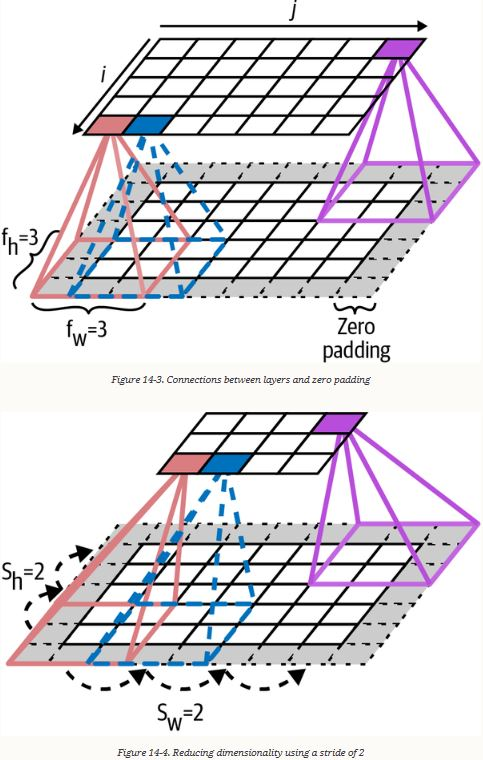

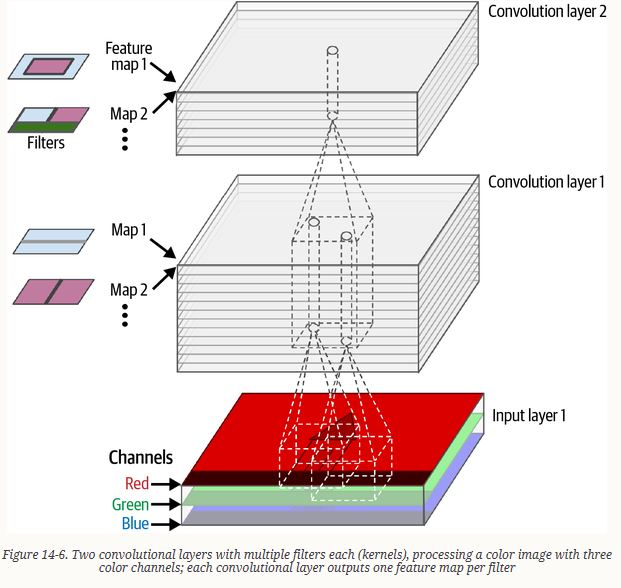

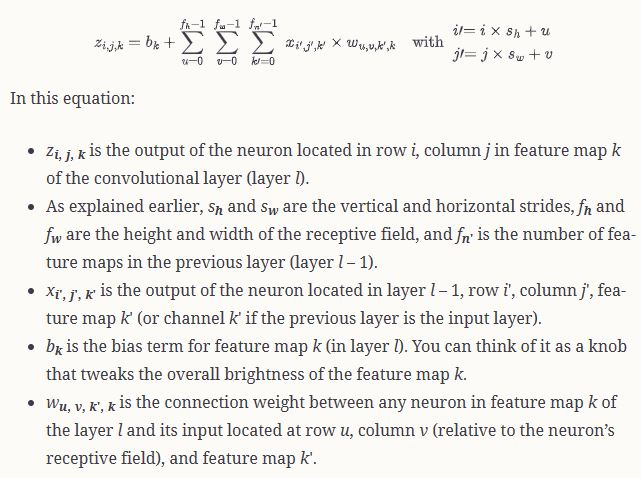

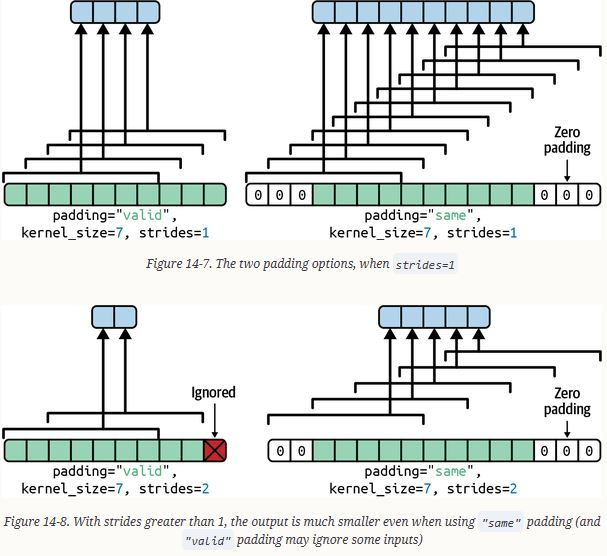

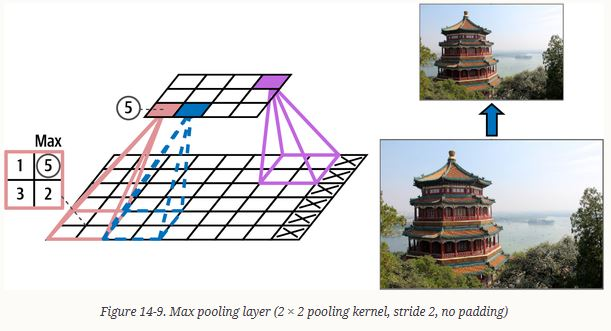

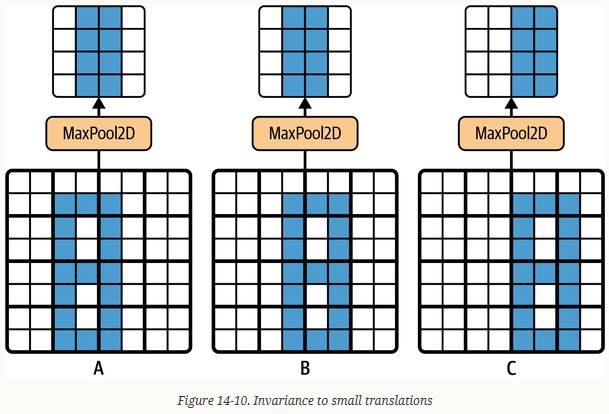

 - AlexNet (2012) --> GoogLeNet (2014) --> ResNet (2015) --> SENet (2017).

 Xception, ResNeXt, DenseNet, MobileNet, CSPNet, and EfficientNet.


## GoogLeNet

 - GoogLeNet actually has 10 times fewer parameters than AlexNet but much deeper

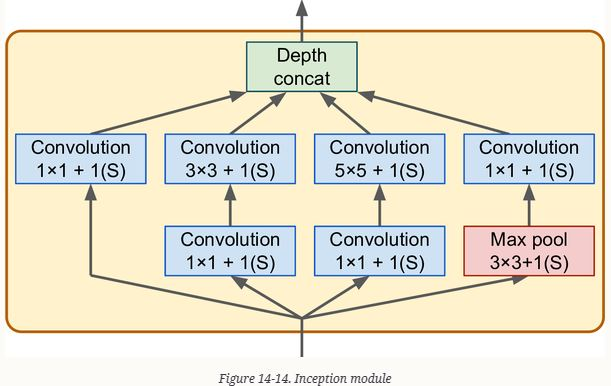

- The notation “3 × 3 + 1(S)” means that the layer uses a 3 × 3 kernel, stride 1, and "same" padding.
- You may wonder why inception modules have convolutional layers with 1 × 1 kernels. Surely these layers cannot capture any features because they look at only one pixel at a time, right? In fact, these layers serve three purposes:

    - Although they cannot capture spatial patterns, they can capture patterns along the depth dimension (i.e., across channels).

    - They are configured to output fewer feature maps than their inputs, so they serve as bottleneck layers, meaning they reduce dimensionality. This cuts the computational cost and the number of parameters, speeding up training and improving generalization.

    - Each pair of convolutional layers ([1 × 1, 3 × 3] and [1 × 1, 5 × 5]) acts like a single powerful convolutional layer, capable of capturing more complex patterns. A convolutional layer is equivalent to sweeping a dense layer across the image (at each location, it only looks at a small receptive field), and these pairs of convolutional layers are equivalent to sweeping two-layer neural networks across the image.

 In short, you can think of the whole inception module as a convolutional layer on steroids, able to output feature maps that capture complex patterns at various scales.

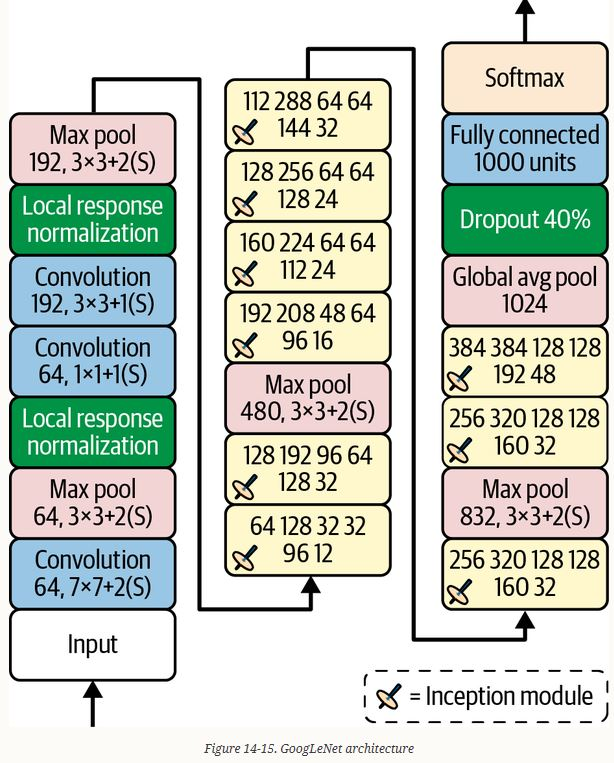

- The first two layers divide the image’s height and width by 4 (so its area is divided by 16), to reduce the computational load. The first layer uses a large kernel size, 7 × 7, so that much of the information is preserved.

- Then the local response normalization layer ensures that the previous layers learn a wide variety of features.

- Two convolutional layers follow, where the first acts like a bottleneck layer. As mentioned, you can think of this pair as a single smarter convolutional layer.

- Again, a local response normalization layer ensures that the previous layers capture a wide variety of patterns.

- Next, a max pooling layer reduces the image height and width by 2, again to speed up computations.

- Then comes the CNN’s backbone: a tall stack of nine inception modules, interleaved with a couple of max pooling layers to reduce dimensionality and speed up the net.

- Next, the global average pooling layer outputs the mean of each feature map: this drops any remaining spatial information, which is fine because there is not much spatial information left at that point. Indeed, GoogLeNet input images are typically expected to be 224 × 224 pixels, so after 5 max pooling layers, each dividing the height and width by 2, the feature maps are down to 7 × 7. Moreover, this is a classification task, not localization, so it doesn’t matter where the object is. Thanks to the dimensionality reduction brought by this layer, there is no need to have several fully connected layers at the top of the CNN (like in AlexNet), and this considerably reduces the number of parameters in the network and limits the risk of overfitting.

- The last layers are self-explanatory: dropout for regularization, then a fully connected layer with 1,000 units (since there are 1,000 classes) and a softmax activation function to output estimated class probabilities.

## VGGNet

It had 2 or 3 convolutional layers and a pooling layer, then again 2 or 3 convolutional layers and a pooling layer, and so on (reaching a total of 16 or 19 convolutional layers, depending on the VGG variant), plus a final dense network with 2 hidden layers and the output layer. It used small 3 × 3 filters, but it had many of them.

## ResNet

- Kaiming He et al. won the ILSVRC 2015 challenge using a Residual Network (ResNet) that delivered an astounding top-five error rate under 3.6%. The winning variant used an extremely deep CNN composed of 152 layers (other variants had 34, 50, and 101 layers). It confirmed the general trend: computer vision models were getting deeper and deeper, with fewer and fewer parameters. The key to being able to train such a deep network is to use skip connections (also called shortcut connections): the signal feeding into a layer is also added to the output of a layer located higher up the stack.

- When training a neural network, the goal is to make it model a target function h(x). If you add the input x to the output of the network (i.e., you add a skip connection), then the network will be forced to model f(x) = h(x) – x rather than h(x). This is called residual learning

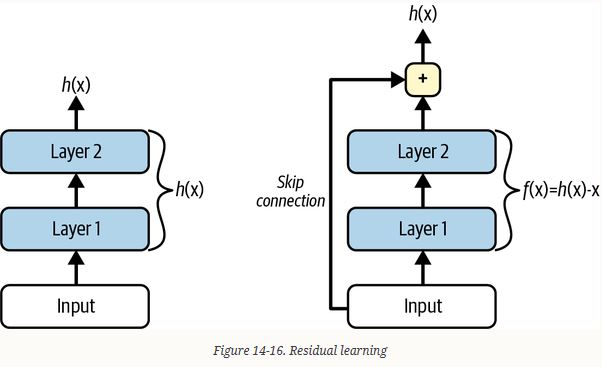

- When you initialize a regular neural network, its weights are close to zero, so the network just outputs values close to zero. If you add a skip connection, the resulting network just outputs a copy of its inputs; in other words, it initially models the identity function. If the target function is fairly close to the identity function (which is often the case), this will speed up training considerably.

- Moreover, if you add many skip connections, the network can start making progress even if several layers have not started learning yet. Thanks to skip connections, the signal can easily make its way across the whole network. The deep residual network can be seen as a stack of residual units (RUs), where each residual unit is a small neural network with a skip connection.

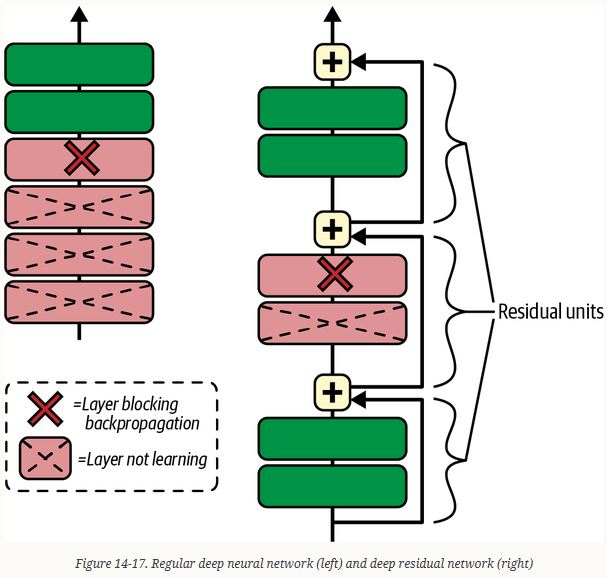

- Now let’s look at ResNet’s architecture. It is surprisingly simple. It starts and ends exactly like GoogLeNet (except without a dropout layer), and in between is just a very deep stack of residual units. Each residual unit is composed of two convolutional layers (and no pooling layer!), with batch normalization (BN) and ReLU activation, using 3 × 3 kernels and preserving spatial dimensions (stride 1, "same" padding).

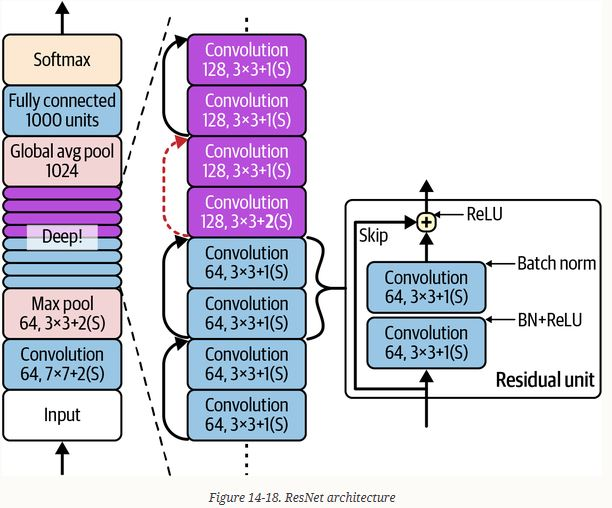

- Note that the number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using a convolutional layer with stride 2). When this happens, the inputs cannot be added directly to the outputs of the residual unit because they don’t have the same shape (for example, this problem affects the skip connection represented by the dashed arrow in Figure 14-18). To solve this problem, the inputs are passed through a 1 × 1 convolutional layer with stride 2 and the right number of output feature maps (see Figure 14-19).



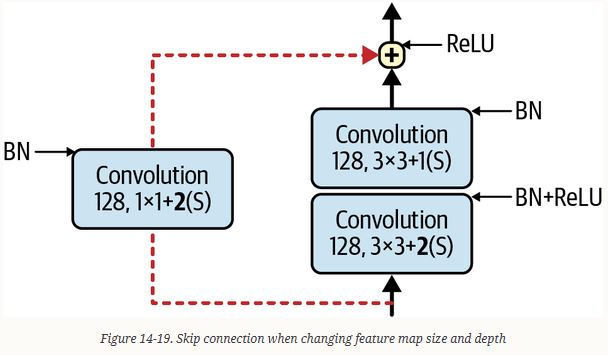

## Google Inception v4

- Google’s Inception-v4 architecture merged the ideas of GoogLeNet and ResNet and achieved a top-five error rate of close to 3% on ImageNet classification.

## Xception

- Just like Inception-v4, it merges the ideas of GoogLeNet and ResNet, but it replaces the inception modules with a special type of layer called a depthwise separable convolution layer (or separable convolution layer for short).
- While a regular convolutional layer uses filters that try to simultaneously capture spatial patterns (e.g., an oval) and cross-channel patterns (e.g., mouth + nose + eyes = face), a separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately (see Figure 14-20). Thus, it is composed of two parts: the first part applies a single spatial filter to each input feature map, then the second part looks exclusively for cross-channel patterns—it is just a regular convolutional layer with 1 × 1 filters.

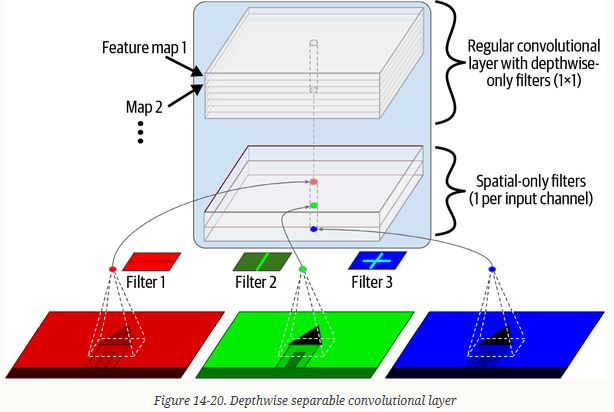

- Separable convolutional layers use fewer parameters, less memory, and fewer computations than regular convolutional layers, and they often perform better. Consider using them by default, except after layers with few channels (such as the input channel). In Keras, just use SeparableConv2D instead of Conv2D: it’s a drop-in replacement. Keras also offers a DepthwiseConv2D layer that implements the first part of a depthwise separable convolutional layer (i.e., applying one spatial filter per input feature map).

## SENet

- This architecture extends existing architectures such as inception networks and ResNets, and boosts their performance. This allowed SENet to win the competition with an astonishing 2.25% top-five error rate! The extended versions of inception networks and ResNets are called SE-Inception and SE-ResNet, respectively. The boost comes from the fact that a SENet adds a small neural network, called an SE block, to every inception module or residual unit in the original architecture

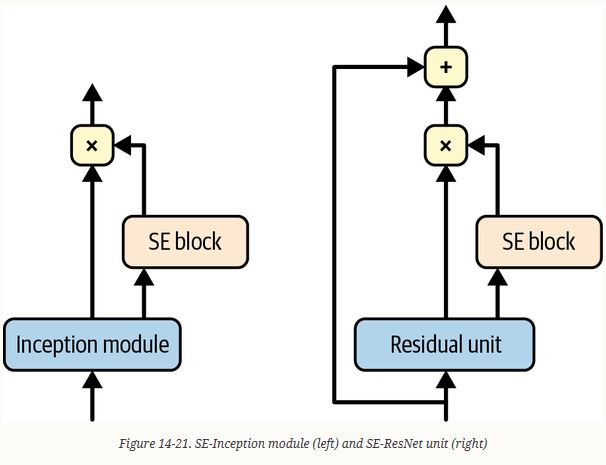

- An SE block analyzes the output of the unit it is attached to, focusing exclusively on the depth dimension (it does not look for any spatial pattern), and it learns which features are usually most active together. It then uses this information to recalibrate the feature maps, as shown in Figure 14-22. For example, an SE block may learn that mouths, noses, and eyes usually appear together in pictures: if you see a mouth and a nose, you should expect to see eyes as well. So, if the block sees a strong activation in the mouth and nose feature maps, but only mild activation in the eye feature map, it will boost the eye feature map (more accurately, it will reduce irrelevant feature maps). If the eyes were somewhat confused with something else, this feature map recalibration will help resolve the ambiguity.

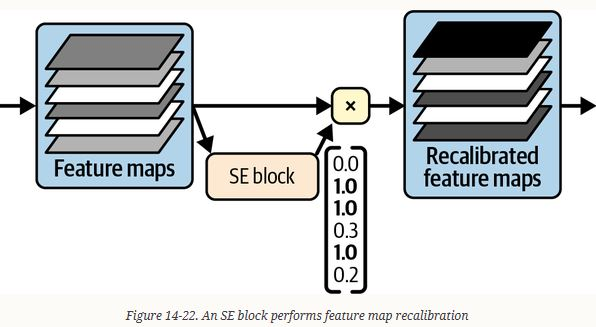

- An SE block is composed of just three layers: a global average pooling layer, a hidden dense layer using the ReLU activation function, and a dense output layer using the sigmoid activation function (see Figure 14-23).
- As earlier, the global average pooling layer computes the mean activation for each feature map: for example, if its input contains 256 feature maps, it will output 256 numbers representing the overall level of response for each filter. The next layer is where the “squeeze” happens: this layer has significantly fewer than 256 neurons—typically 16 times fewer than the number of feature maps (e.g., 16 neurons)—so the 256 numbers get compressed into a small vector (e.g., 16 dimensions). This is a low-dimensional vector representation (i.e., an embedding) of the distribution of feature responses. This bottleneck step forces the SE block to learn a general representation of the feature combinations (we will see this principle in action again when we discuss autoencoders). Finally, the output layer takes the embedding and outputs a recalibration vector containing one number per feature map (e.g., 256), each between 0 and 1. The feature maps are then multiplied by this recalibration vector, so irrelevant features (with a low recalibration score) get scaled down while relevant features (with a recalibration score close to 1) are left alone.

## DenseNet

- A DenseNet is composed of several dense blocks, each made up of a few densely connected convolutional layers. This architecture achieved excellent accuracy while using comparatively few parameters. What does “densely connected” mean? The output of each layer is fed as input to every layer after it within the same block. For example, layer 4 in a block takes as input the depthwise concatenation of the outputs of layers 1, 2, and 3 in that block. Dense blocks are separated by a few transition layers.

## EfficientNet

- EfficientNet is arguably the most important model in this list. The authors proposed a method to scale any CNN efficiently, by jointly increasing the depth (number of layers), width (number of filters per layer), and resolution (size of the input image) in a principled way. This is called compound scaling. They used neural architecture search to find a good architecture for a scaled-down version of ImageNet (with smaller and fewer images), and then used compound scaling to create larger and larger versions of this architecture. When EfficientNet models came out, they vastly outperformed all existing models, across all compute budgets, and they remain among the best models out there today.

- Understanding EfficientNet’s compound scaling method is helpful to gain a deeper understanding of CNNs, especially if you ever need to scale a CNN architecture. It is based on a logarithmic measure of the compute budget, noted ϕ: if your compute budget doubles, then ϕ increases by 1. In other words, the number of floating-point operations available for training is proportional to 2ϕ. Your CNN architecture’s depth, width, and resolution should scale as αϕ, βϕ, and γϕ, respectively. The factors α, β, and γ must be greater than 1, and α + β2 + γ2 should be close to 2. The optimal values for these factors depend on the CNN’s architecture. To find the optimal values for the EfficientNet architecture, the authors started with a small baseline model (EfficientNetB0), fixed ϕ = 1, and simply ran a grid search: they found α = 1.2, β = 1.1, and γ = 1.1. They then used these factors to create several larger architectures, named EfficientNetB1 to EfficientNetB7, for increasing values of ϕ.

## Choosing the Right CNN Architecture

| Class Name         | Size (MB) | Top-1 Acc | Top-5 Acc | Params | CPU (ms) | GPU (ms) |
| ------------------ | --------- | --------- | --------- | ------ | -------- | -------- |
| MobileNetV2        | 14        | 71.3%     | 90.1%     | 3.5M   | 25.9     | 3.8      |
| MobileNet          | 16        | 70.4%     | 89.5%     | 4.3M   | 22.6     | 3.4      |
| NASNetMobile       | 23        | 74.4%     | 91.9%     | 5.3M   | 27.0     | 6.7      |
| EfficientNetB0     | 29        | 77.1%     | 93.3%     | 5.3M   | 46.0     | 4.9      |
| EfficientNetB1     | 31        | 79.1%     | 94.4%     | 7.9M   | 60.2     | 5.6      |
| EfficientNetB2     | 36        | 80.1%     | 94.9%     | 9.2M   | 80.8     | 6.5      |
| EfficientNetB3     | 48        | 81.6%     | 95.7%     | 12.3M  | 140.0    | 8.8      |
| EfficientNetB4     | 75        | 82.9%     | 96.4%     | 19.5M  | 308.3    | 15.1     |
| InceptionV3        | 92        | 77.9%     | 93.7%     | 23.9M  | 42.2     | 6.9      |
| ResNet50V2         | 98        | 76.0%     | 93.0%     | 25.6M  | 45.6     | 4.4      |
| EfficientNetB5     | 118       | 83.6%     | 96.7%     | 30.6M  | 579.2    | 25.3     |
| EfficientNetB6     | 166       | 84.0%     | 96.8%     | 43.3M  | 958.1    | 40.4     |
| ResNet101V2        | 171       | 77.2%     | 93.8%     | 44.7M  | 72.7     | 5.4      |
| InceptionResNetV2  | 215       | 80.3%     | 95.3%     | 55.9M  | 130.2    | 10.0     |
| EfficientNetB7     | 256       | 84.3%     | 97.0%     | 66.7M  | 1578.9   | 61.6     |


## Transfer learning

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
tf.keras.backend.clear_session()

### Load data

In [2]:
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1.incompleteKNZYI9',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [4]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

dataset_size, n_classes, class_names

(3670, 5, ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'])

In [5]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

In [6]:
len(train_set_raw), len(valid_set_raw), len(test_set_raw)

(2752, 551, 367)

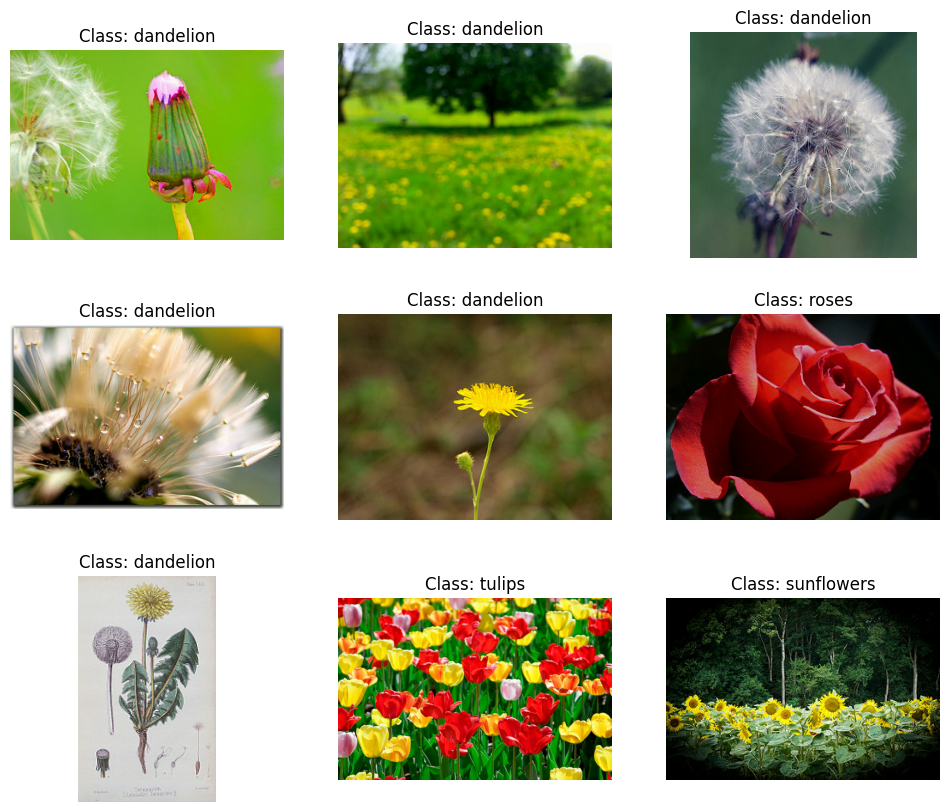

In [7]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in valid_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis("off")

### Preprocess data

In [9]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B2(weights="imagenet", include_top=False)

35839040/35839040 [==============================] - 0s 0us/step


In [10]:
base_model.input # Base model already contain the scaling layer

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [11]:
batch_size = 32
resize = tf.keras.layers.Resizing(height=260, width=260, crop_to_aspect_ratio=True)
train_set = train_set_raw.map(lambda X, y: (resize(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (resize(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (resize(X), y)).batch(batch_size)

### Train with freezed weights

In [12]:
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
out = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=out)

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
86/86 [==============================] - 32s 194ms/step - loss: 0.4127 - accuracy: 0.8674 - val_loss: 0.3552 - val_accuracy: 0.8929
Epoch 2/5
86/86 [==============================] - 12s 132ms/step - loss: 0.2022 - accuracy: 0.9382 - val_loss: 0.3784 - val_accuracy: 0.9093
Epoch 3/5
86/86 [==============================] - 13s 143ms/step - loss: 0.1617 - accuracy: 0.9517 - val_loss: 0.2938 - val_accuracy: 0.9074
Epoch 4/5
86/86 [==============================] - 13s 137ms/step - loss: 0.1153 - accuracy: 0.9604 - val_loss: 0.3727 - val_accuracy: 0.9002
Epoch 5/5
86/86 [==============================] - 13s 140ms/step - loss: 0.0982 - accuracy: 0.9680 - val_loss: 0.3306 - val_accuracy: 0.9038


In [15]:
model.save("freezed_flower_classifier")

### Fine-Tuning

In [16]:
model = tf.keras.models.load_model("freezed_flower_classifier")

In [17]:
len(model.layers)

351

In [18]:
for row_indices in zip(range(70), range(70, 140), range(140, 210), range(210, 280), range(280, 350)):
    for row_idx in row_indices:
        print(f"{row_idx:3}: {model.layers[row_idx].name:30}", end="")
    print()

  0: input_1                        70: block4b_activation            140: block5c_expand_activation     210: block6a_project_bn            280: block6f_se_expand             
  1: rescaling                      71: block4b_se_squeeze            141: block5c_dwconv2               211: block6b_expand_conv           281: block6f_se_excite             
  2: normalization                  72: block4b_se_reshape            142: block5c_bn                    212: block6b_expand_bn             282: block6f_project_conv          
  3: stem_conv                      73: block4b_se_reduce             143: block5c_activation            213: block6b_expand_activation     283: block6f_project_bn            
  4: stem_bn                        74: block4b_se_expand             144: block5c_se_squeeze            214: block6b_dwconv2               284: block6f_drop                  
  5: stem_activation                75: block4b_se_excite             145: block5c_se_reshape            215: block6b_bn

In [19]:
for layer in model.layers[198:]: # activate 6th block
    layer.trainable = True

In [21]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    './temp/checkpoint',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
86/86 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9829
Epoch 1: val_loss improved from inf to 0.19278, saving model to ./temp/checkpoint
86/86 [==============================] - 43s 242ms/step - loss: 0.0591 - accuracy: 0.9829 - val_loss: 0.1928 - val_accuracy: 0.9347
Epoch 2/10
86/86 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9898
Epoch 2: val_loss improved from 0.19278 to 0.18994, saving model to ./temp/checkpoint
86/86 [==============================] - 20s 221ms/step - loss: 0.0354 - accuracy: 0.9898 - val_loss: 0.1899 - val_accuracy: 0.9347
Epoch 3/10
86/86 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9945
Epoch 3: val_loss improved from 0.18994 to 0.18830, saving model to ./temp/checkpoint
86/86 [==============================] - 19s 212ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.1883 - val_accuracy: 0.9347
Epoch 4/10
86/86 [==============================] - ETA: 0s - loss: 

In [22]:
model.load_weights("./temp/checkpoint")

In [25]:
model.evaluate(test_set)

12/12 [==============================] - 4s 289ms/step - loss: 0.1719 - accuracy: 0.9564


[0.1719064712524414, 0.9564032554626465]

## Classification and Localization